# TP 3

## Importaciones generales y cargo de csv's

In [ ]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
import numpy as np
import time

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials # Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Importación y merge

In [ ]:
id = '1eN14-f3gbOCqoxkamVbH9RrZCIrmA6qG'
file_name = "train_identity.csv"
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile(file_name)

df_train_identity = pd.read_csv(file_name)

In [ ]:
id = '1oHr_x71U0_5TG5Hsmbb5F7nyqdAZoZIN'
file_name = "train_transaction.csv"
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile(file_name)

df_train_transaction = pd.read_csv(file_name)

In [ ]:
id = '16X0onJVcF0UPzT2hOkVLXCfqXGDh342_'
file_name = "test_identity.csv"
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile(file_name)

df_test_identity = pd.read_csv(file_name)

In [ ]:
id = '1gLlf0Iz5YzOdBtXZrkQtHFxxyb_Azwd5'
file_name = "test_transaction.csv"
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile(file_name)

df_test_transaction = pd.read_csv(file_name)

### Reviso el df_train_transaction

In [ ]:
df_train_transaction

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,nan,150.00,discover,142.00,credit,315.00,87.00,19.00,nan,NaN,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,2.00,0.00,1.00,1.00,14.00,nan,13.00,nan,nan,nan,nan,nan,nan,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,117.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,117.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,2987001,0,86401,29.00,W,2755,404.00,150.00,mastercard,102.00,credit,325.00,87.00,nan,nan,gmail.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,2987002,0,86469,59.00,W,4663,490.00,150.00,visa,166.00,debit,330.00,87.00,287.00,nan,outlook.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,2987003,0,86499,50.00,W,18132,567.00,150.00,mastercard,117.00,debit,476.00,87.00,nan,nan,yahoo.com,NaN,2.00,5.00,0.00,0.00,0.00,4.00,0.00,0.00,1.00,0.00,1.00,0.00,25.00,1.00,112.00,112.00,0.00,94.00,0.00,nan,nan,nan,nan,...,0.00,0.00,0.00,0.00,0.00,1.00,50.00,"1,758.00",925.00,0.00,354.00,0.00,135.00,0.00,0.00,0.00,50.00,"1,404.00",790.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,2987004,0,86506,50.00,H,4497,514.00,150.00,mastercard,102.00,credit,420.00,87.00,nan,nan,gmail.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,...,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,nan,150.00,visa,226.00,debit,272.00,87.00,48.00,nan,NaN,NaN,2.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,2.00,0.00,1.00,0.00,3.00,2.00,29.00,29.00,30.00,nan,nan,nan,nan,nan,nan,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,47.95,0.00,0.00,47.95,0.00,0.00,47.95,47.95,47.95,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
590536,3577536,0,15811049,39.50,W,10444,225.00,150.00,mastercard,224.00,debit,204.00,87.00,nan,nan,gmail.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
590537,3577537,0,15811079,30.95,W,12037,595.00,150.00,mastercard,224.00,debit,231.00,87.00,nan,nan,gmail.com,NaN,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,n

In [ ]:
df_train_transaction.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 394 columns):
 #   Column          Dtype  
---  ------          -----  
 0   TransactionID   int64  
 1   isFraud         int64  
 2   TransactionDT   int64  
 3   TransactionAmt  float64
 4   ProductCD       object 
 5   card1           int64  
 6   card2           float64
 7   card3           float64
 8   card4           object 
 9   card5           float64
 10  card6           object 
 11  addr1           float64
 12  addr2           float64
 13  dist1           float64
 14  dist2           float64
 15  P_emaildomain   object 
 16  R_emaildomain   object 
 17  C1              float64
 18  C2              float64
 19  C3              float64
 20  C4              float64
 21  C5              float64
 22  C6              float64
 23  C7              float64
 24  C8              float64
 25  C9              float64
 26  C10             float64
 27  C11             float64
 28  C12          

In [ ]:
for col, values in df_train_transaction.iteritems():
    num_uniques = values.nunique()
    print ('{name}: {num_unique}'.format(name=col, num_unique=num_uniques))
    print (values.unique())
    print ('\n')

TransactionID: 590540
[2987000 2987001 2987002 ... 3577537 3577538 3577539]


isFraud: 2
[0 1]


TransactionDT: 573349
[   86400    86401    86469 ... 15811079 15811088 15811131]


TransactionAmt: 20902
[  68.5    29.     59.   ...  557.54 1659.95  400.78]


ProductCD: 5
['W' 'H' 'C' 'S' 'R']


card1: 13553
[13926  2755  4663 ... 13166  8767 18038]


card2: 500
[ nan 404. 490. 567. 514. 555. 360. 100. 111. 352. 375. 418. 303. 314.
 543. 583. 148. 321. 269. 361. 272. 399. 569. 453. 417. 512. 545. 266.
 114. 481. 452. 547. 383. 170. 343. 556. 285. 562. 302. 264. 558. 500.
 396. 103. 206. 143. 243. 476. 199. 174. 423. 446. 492. 523. 440. 528.
 161. 535. 354. 117. 455. 325. 158. 268. 122. 479. 147. 215. 480. 265.
 388. 408. 309. 415. 414. 437. 104. 225. 101. 134. 586. 191. 491. 369.
 322. 494. 532. 313. 474. 324. 475. 298. 429. 432. 553. 566. 599. 296.
 251. 310. 242. 204. 250. 270. 346. 316. 194. 587. 390. 135. 536. 254.
 226. 327. 420. 260. 413. 428. 561. 387. 411. 392. 203. 297. 136. 27

In [ ]:
for i in df_train_transaction.columns: 
    promedio = 100*df_train_transaction[i].isnull().sum()/len(df_train_transaction[i])
    print("La columna " + i + " tiene " + str(promedio) + " % de elementos nulos")

La columna TransactionID tiene 0.0 % de elementos nulos
La columna isFraud tiene 0.0 % de elementos nulos
La columna TransactionDT tiene 0.0 % de elementos nulos
La columna TransactionAmt tiene 0.0 % de elementos nulos
La columna ProductCD tiene 0.0 % de elementos nulos
La columna card1 tiene 0.0 % de elementos nulos
La columna card2 tiene 1.5126833068039423 % de elementos nulos
La columna card3 tiene 0.26501168422122123 % de elementos nulos
La columna card4 tiene 0.267043722694483 % de elementos nulos
La columna card5 tiene 0.7212043214684865 % de elementos nulos
La columna card6 tiene 0.26602770345785215 % de elementos nulos
La columna addr1 tiene 11.12642666034477 % de elementos nulos
La columna addr2 tiene 11.12642666034477 % de elementos nulos
La columna dist1 tiene 59.6523520845328 % de elementos nulos
La columna dist2 tiene 93.62837403054831 % de elementos nulos
La columna P_emaildomain tiene 15.99485216920107 % de elementos nulos
La columna R_emaildomain tiene 76.75161716395164

### Reviso el df_train_identity

In [ ]:
df_train_identity

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.00,"70,787.00",nan,nan,nan,nan,nan,nan,nan,nan,100.00,NotFound,nan,-480.00,New,NotFound,166.00,nan,542.00,144.00,nan,nan,NaN,nan,nan,nan,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.00,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.00,"98,945.00",nan,nan,0.00,-5.00,nan,nan,nan,nan,100.00,NotFound,49.00,-300.00,New,NotFound,166.00,nan,621.00,500.00,nan,nan,NaN,nan,nan,nan,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.00,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.00,"191,631.00",0.00,0.00,0.00,0.00,nan,nan,0.00,0.00,100.00,NotFound,52.00,nan,Found,Found,121.00,nan,410.00,142.00,nan,nan,NaN,nan,nan,nan,NaN,Found,Found,NaN,chrome 62.0,nan,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.00,"221,832.00",nan,nan,0.00,-6.00,nan,nan,nan,nan,100.00,NotFound,52.00,nan,New,NotFound,225.00,nan,176.00,507.00,nan,nan,NaN,nan,nan,nan,NaN,New,NotFound,NaN,chrome 62.0,nan,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.00,"7,460.00",0.00,0.00,1.00,0.00,nan,nan,0.00,0.00,100.00,NotFound,nan,-300.00,Found,Found,166.00,15.00,529.00,575.00,nan,nan,NaN,nan,nan,nan,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.00,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.00,"145,955.00",0.00,0.00,0.00,0.00,nan,nan,0.00,0.00,100.00,NotFound,27.00,nan,Found,Found,225.00,nan,427.00,139.00,nan,nan,NaN,nan,nan,nan,NaN,Found,Found,NaN,chrome 66.0 for android,nan,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,-5.00,"172,059.00",nan,nan,1.00,-5.00,nan,nan,nan,nan,100.00,NotFound,27.00,-300.00,New,NotFound,166.00,15.00,352.00,333.00,nan,nan,NaN,nan,nan,nan,NaN,New,NotFound,Android 7.1.1,chrome 55.0 for android,32.00,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3577529,-20.00,"632,381.00",nan,nan,-1.00,-36.00,nan,nan,nan,nan,100.00,NotFound,27.00,nan,New,NotFound,225.00,27.00,567.00,411.00,nan,nan,NaN,nan,nan,nan,NaN,New,NotFound,NaN,chrome 65.0 for android,nan,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,-5.00,"55,528.00",0.00,0.00,0.00,-7.00,nan,nan,0.00,0.00,100.00,NotFound,27.00,-300.00,Found,Found,166.00,15.00,352.00,368.00,nan,nan,NaN,nan,nan,nan,NaN,Found,Found,Mac OS X 10_9_5,chrome 66.0,24.00,2560x1600,match_status:2,T,F,T,F,desktop,MacOS


In [ ]:
df_train_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [ ]:
for col, values in df_train_identity.iteritems():
    num_uniques = values.nunique()
    print ('{name}: {num_unique}'.format(name=col, num_unique=num_uniques))
    print (values.unique())
    print ('\n')

TransactionID: 144233
[2987004 2987008 2987010 ... 3577529 3577531 3577534]


id_01: 77
[   0.   -5.  -15.  -10.  -20.  -40.  -30.  -25.  -55.  -45.  -70.  -90.
 -100.  -65.  -60.  -75.  -72.  -50.  -21.  -35.  -85.  -64.  -80.  -95.
  -87.  -58.   -7.  -12.  -11.   -9.  -27.  -42.   -6.  -62.  -18.  -76.
  -23.  -19.  -99.  -13.  -26.  -31.  -17.  -22.  -14.  -34.  -54.  -53.
  -28.  -88.  -16.  -61.  -46.  -94.  -24.  -93.  -44.  -89.  -92.  -37.
  -96.  -57.  -29.  -33.  -32.   -8.  -52.  -43.  -38.  -86.  -47.  -82.
  -48.  -63.  -71.  -56.  -51.]


id_02: 115655
[ 70787.  98945. 191631. ... 172059. 632381.  55528.]


id_03: 24
[ nan   0.   3.   2.   5.   1.   6.   9.   4.  -5.  -9.  -2.  -4.  -1.
  -3.  -7.  -6. -11.   7.  -8.  10. -10.   8. -12. -13.]


id_04: 15
[ nan   0. -11.  -5.  -8.  -1.  -6.  -9.  -3. -13.  -4. -10.  -7. -12.
  -2. -28.]


id_05: 93
[ nan   0.   1.   3.   2.   9.  12.   6.   4.  21.   7.   5.  18.  17.
  -1.  11.   8.  10. -10.  -8.  40.  13.  19.  -3.  14

In [ ]:
for i in df_train_identity.columns: 
    promedio = 100*df_train_identity[i].isnull().sum()/len(df_train_identity[i])
    print("La columna " + i + " tiene " + str(promedio) + " % de elementos nulos")

La columna TransactionID tiene 0.0 % de elementos nulos
La columna id_01 tiene 0.0 % de elementos nulos
La columna id_02 tiene 2.33025729202055 % de elementos nulos
La columna id_03 tiene 54.016071218098496 % de elementos nulos
La columna id_04 tiene 54.016071218098496 % de elementos nulos
La columna id_05 tiene 5.108400990064687 % de elementos nulos
La columna id_06 tiene 5.108400990064687 % de elementos nulos
La columna id_07 tiene 96.42592194574057 % de elementos nulos
La columna id_08 tiene 96.42592194574057 % de elementos nulos
La columna id_09 tiene 48.05211012736336 % de elementos nulos
La columna id_10 tiene 48.05211012736336 % de elementos nulos
La columna id_11 tiene 2.256765095366525 % de elementos nulos
La columna id_12 tiene 0.0 % de elementos nulos
La columna id_13 tiene 11.726165301976662 % de elementos nulos
La columna id_14 tiene 44.50368500967185 % de elementos nulos
La columna id_15 tiene 2.2519118370969196 % de elementos nulos
La columna id_16 tiene 10.3256536298905

Se observa que las columnas: id_03, id_04, id_07 - id_10, id_14, id_18, id_21 - id_27, id_30, id_32 - id_34 tienen casi o más de la mitad de sus elementos nulos.

Las columnas que parecen mas interesantes son: id_01 e id_12 que casi no tienen elementos nulos

### Uno los df

In [ ]:
df_identities_y_transactions = pd.merge(right = df_train_identity, left = df_train_transaction, left_on='TransactionID', right_on='TransactionID', how = 'outer')
df_identities_y_transactions

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,nan,150.00,discover,142.00,credit,315.00,87.00,19.00,nan,NaN,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,2.00,0.00,1.00,1.00,14.00,nan,13.00,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.00,150.00,mastercard,102.00,credit,325.00,87.00,nan,nan,gmail.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.00,150.00,visa,166.00,debit,330.00,87.00,287.00,nan,outlook.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.00,150.00,mastercard,117.00,debit,476.00,87.00,nan,nan,yahoo.com,NaN,2.00,5.00,0.00,0.00,0.00,4.00,0.00,0.00,1.00,0.00,1.00,0.00,25.00,1.00,112.00,112.00,0.00,94.00,0.00,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.00,150.00,mastercard,102.00,credit,420.00,87.00,nan,nan,gmail.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,...,0.00,"70,787.00",nan,nan,nan,nan,nan,nan,nan,nan,100.00,NotFound,nan,-480.00,New,NotFound,166.00,nan,542.00,144.00,nan,nan,NaN,nan,nan,nan,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.00,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,nan,150.00,visa,226.00,debit,272.00,87.00,48.00,nan,NaN,NaN,2.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,2.00,0.00,1.00,0.00,3.00,2.00,29.00,29.00,30.00,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.00,150.00,mastercard,224.00,debit,204.00,87.00,nan,nan,gmail.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.00,150.00,mastercard,224.00,debit,231.00,87.00,nan,nan,gmail.com,NaN,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.00,150.00,master

In [ ]:
df_train = df_identities_y_transactions
df_train.to_csv('df_train.csv')

## Parte  II: Machine Learning Baseline

### Gráficos de correlación

In [ ]:
df_train = df_identities_y_transactions
df_train

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,nan,150.00,discover,142.00,credit,315.00,87.00,19.00,nan,NaN,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,2.00,0.00,1.00,1.00,14.00,nan,13.00,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.00,150.00,mastercard,102.00,credit,325.00,87.00,nan,nan,gmail.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.00,150.00,visa,166.00,debit,330.00,87.00,287.00,nan,outlook.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.00,150.00,mastercard,117.00,debit,476.00,87.00,nan,nan,yahoo.com,NaN,2.00,5.00,0.00,0.00,0.00,4.00,0.00,0.00,1.00,0.00,1.00,0.00,25.00,1.00,112.00,112.00,0.00,94.00,0.00,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.00,150.00,mastercard,102.00,credit,420.00,87.00,nan,nan,gmail.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,...,0.00,"70,787.00",nan,nan,nan,nan,nan,nan,nan,nan,100.00,NotFound,nan,-480.00,New,NotFound,166.00,nan,542.00,144.00,nan,nan,NaN,nan,nan,nan,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.00,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,nan,150.00,visa,226.00,debit,272.00,87.00,48.00,nan,NaN,NaN,2.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,2.00,0.00,1.00,0.00,3.00,2.00,29.00,29.00,30.00,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.00,150.00,mastercard,224.00,debit,204.00,87.00,nan,nan,gmail.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.00,150.00,mastercard,224.00,debit,231.00,87.00,nan,nan,gmail.com,NaN,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.00,150.00,master

In [ ]:
# Correlacion negativa --> una variable decrece mientras la otra crece o viceversa
# Correlacion positiva --> una varibale crece mientras la otra tambien, o las dos decrecen.

#plt.figure(figsize=(10,100), dpi=85)
#plt.title("Correlacion de variables respecto a isFraud", weight='bold')
#df_train.corr()['isFraud'].drop('isFraud').sort_values(ascending=False).plot.barh()
#plt.ylabel('Feature', weight='bold')
#plt.xlabel("Nivel de correlacion", weight='bold')
#plt.show()

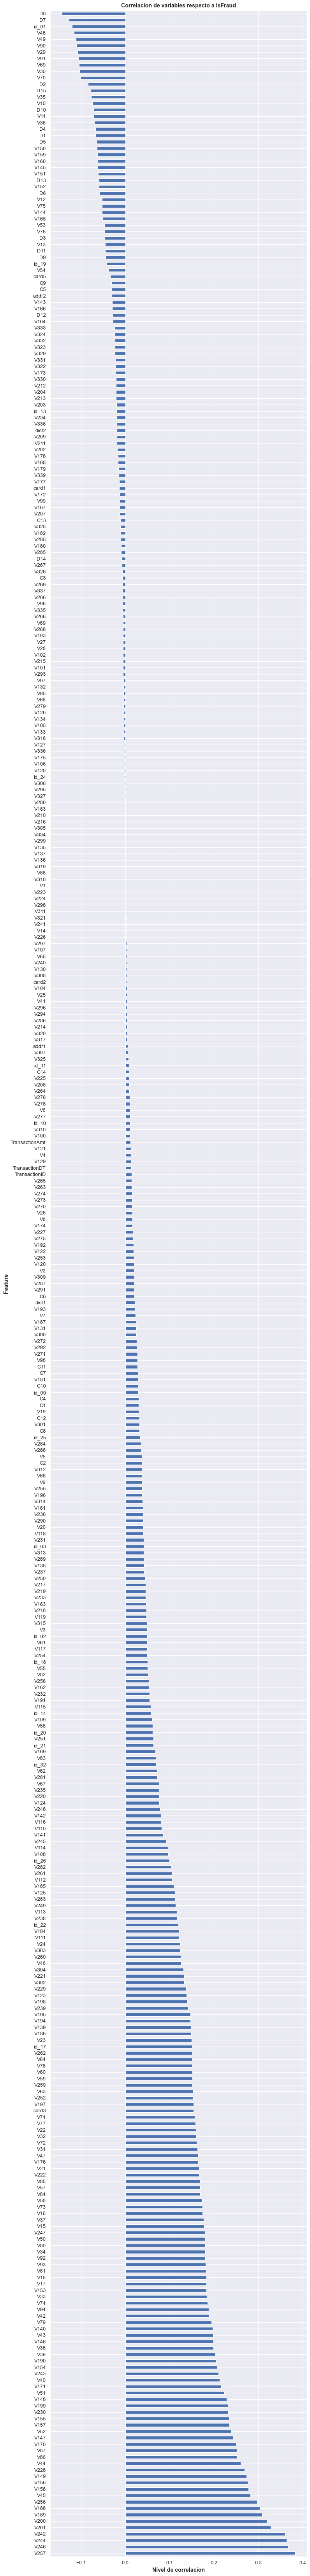

In [ ]:
# Heatmap de correlaciones
#plt.figure(figsize=(10, 10), dpi=85)
#plt.title("Matriz de correlaciones", weight='bold')
#sns.heatmap(df_train.corr())
#plt.show()

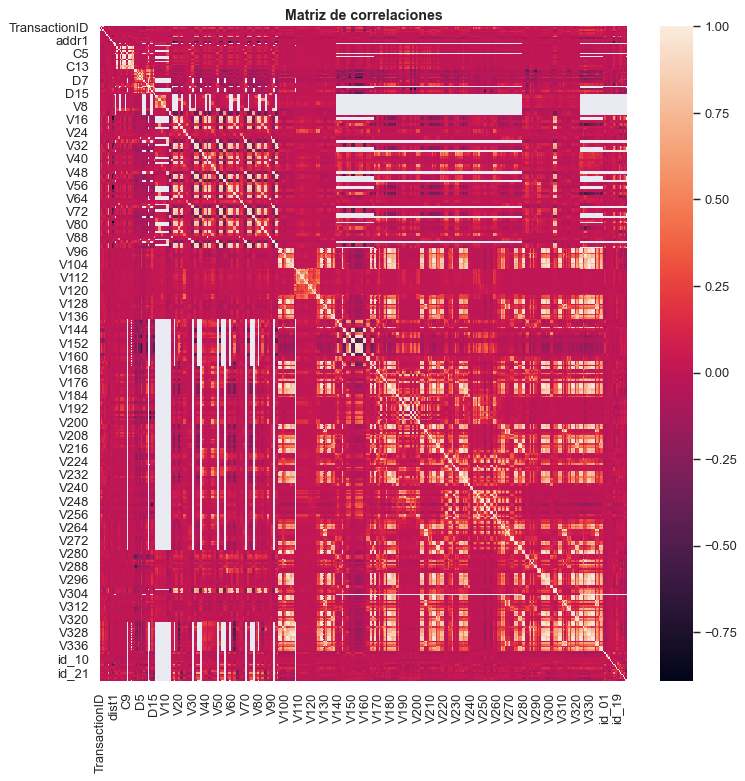

### Trabajo los csv de test

In [ ]:
df_test_transaction

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.00,150.00,visa,226.00,debit,170.00,87.00,1.00,nan,gmail.com,NaN,6.00,6.00,0.00,0.00,3.00,4.00,0.00,0.00,6.00,0.00,5.00,1.00,115.00,6.00,419.00,419.00,27.00,398.00,27.00,nan,nan,nan,nan,418.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,47.95,0.00,0.00,47.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,3663550,18403263,49.00,W,4272,111.00,150.00,visa,226.00,debit,299.00,87.00,4.00,nan,aol.com,NaN,3.00,2.00,0.00,0.00,0.00,1.00,0.00,0.00,2.00,0.00,1.00,1.00,12.00,2.00,149.00,149.00,7.00,634.00,7.00,nan,nan,nan,nan,231.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,280.00,77.00,0.00,280.00,0.00,77.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,3663551,18403310,171.00,W,4476,574.00,150.00,visa,226.00,debit,472.00,87.00,"2,635.00",nan,hotmail.com,NaN,2.00,2.00,0.00,0.00,0.00,5.00,0.00,0.00,4.00,0.00,2.00,0.00,22.00,2.00,137.00,137.00,10.00,97.00,10.00,nan,nan,nan,nan,136.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,"1,321.00",0.00,0.00,"1,058.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,263.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,3663552,18403310,284.95,W,10989,360.00,150.00,visa,166.00,debit,205.00,87.00,17.00,nan,gmail.com,NaN,5.00,2.00,0.00,0.00,1.00,1.00,0.00,0.00,2.00,0.00,2.00,0.00,7.00,4.00,42.00,42.00,41.00,242.00,41.00,nan,nan,nan,nan,242.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,282.54,282.54,282.54,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,3663553,18403317,67.95,W,18018,452.00,150.00,mastercard,117.00,debit,264.00,87.00,6.00,nan,gmail.com,NaN,6.00,6.00,0.00,0.00,2.00,5.00,0.00,0.00,5.00,0.00,6.00,0.00,14.00,6.00,22.00,22.00,0.00,22.00,0.00,nan,nan,nan,nan,22.00,...,0.00,0.00,0.00,0.00,0.00,1.00,67.95,183.85,67.95,67.95,183.85,67.95,67.95,67.95,183.85,67.95,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,34214279,94.68,C,13832,375.00,185.00,mastercard,224.00,debit,284.00,60.00,nan,nan,gmail.com,gmail.com,1.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,nan,nan,0.00,nan,0.00,nan,nan,nan,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
506687,4170236,34214287,12.17,C,3154,408.00,185.00,mastercard,224.00,debit,nan,nan,nan,157.00,hotmail.com,hotmail.com,1.00,3.00,0.00,1.00,0.00,1.00,1.00,2.00,0.00,2.00,1.00,1.00,3.00,1.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,nan,nan,0.00,...,0.00,0.00,1.00,2.00,1.00,1.00,0.00,31.72,0.00,0.00,31.72,0.00,0.00,31.72,31.72,31.72,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
506688,4170237,34214326,49.00,W,16661,490.00,150.00,visa,226.00,debit,327.00,87.00,nan,nan,hotmail.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,

In [ ]:
df_test_identity

,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.00,"280,290.00",nan,nan,0.00,0.00,nan,nan,nan,nan,100.00,NotFound,27.00,nan,New,NotFound,225.00,15.00,427.00,563.00,nan,nan,NaN,nan,nan,nan,NaN,New,NotFound,NaN,chrome 67.0 for android,nan,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.00,"3,579.00",0.00,0.00,0.00,0.00,nan,nan,0.00,0.00,100.00,Found,nan,-300.00,Found,Found,166.00,nan,542.00,368.00,nan,nan,NaN,nan,nan,nan,NaN,Found,Found,Android 6.0.1,chrome 67.0 for android,24.00,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.00,"185,210.00",nan,nan,1.00,0.00,nan,nan,nan,nan,100.00,NotFound,52.00,-360.00,New,NotFound,225.00,nan,271.00,507.00,nan,nan,NaN,nan,nan,nan,NaN,New,NotFound,NaN,ie 11.0 for tablet,nan,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.00,"252,944.00",0.00,0.00,0.00,0.00,nan,nan,0.00,0.00,100.00,NotFound,27.00,nan,Found,Found,225.00,15.00,427.00,563.00,nan,nan,NaN,nan,nan,nan,NaN,Found,Found,NaN,chrome 67.0 for android,nan,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.00,"328,680.00",nan,nan,7.00,-33.00,nan,nan,nan,nan,100.00,NotFound,27.00,nan,New,NotFound,225.00,15.00,567.00,507.00,nan,nan,NaN,nan,nan,nan,NaN,New,NotFound,NaN,chrome 67.0 for android,nan,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141902,4170230,-20.00,"473,365.00",nan,nan,0.00,0.00,nan,nan,nan,nan,100.00,NotFound,27.00,nan,New,NotFound,225.00,nan,153.00,325.00,nan,nan,NaN,nan,nan,nan,NaN,New,NotFound,NaN,chrome 71.0 for android,nan,NaN,NaN,F,F,T,F,mobile,SM-J700M
141903,4170233,-5.00,"489,917.00",0.00,0.00,-4.00,-32.00,nan,nan,0.00,0.00,100.00,NotFound,27.00,nan,Found,Found,225.00,17.00,417.00,595.00,nan,nan,NaN,nan,nan,nan,NaN,Found,Found,NaN,chrome 71.0 for android,nan,NaN,NaN,F,F,T,F,mobile,SM-J320M
141904,4170234,-5.00,"110,081.00",nan,nan,22.00,-31.00,nan,nan,nan,nan,100.00,NotFound,27.00,-300.00,New,NotFound,166.00,15.00,122.00,177.00,nan,nan,NaN,nan,nan,nan,NaN,New,NotFound,iOS 10.3.3,mobile safari 10.0,32.00,1334x750,match_status:2,T,F,F,T,mobile,iOS Device
141905,4170236,-45.00,"266,704.00",nan,nan,-3.00,-10.00,nan,nan,nan,nan,100.00,NotFound,27.00,nan,New,NotFound,225.00,15.00,176.00,507.00,nan,nan,NaN,nan,nan,nan,NaN,New,NotFound,NaN,chrome 43.0 for android,nan,NaN,NaN,F,F,T,F,mobile,ALE-L23 Build/HuaweiALE-L23


In [ ]:
df_identities_y_transactions_test = pd.merge(right = df_test_identity, left = df_test_transaction, left_on='TransactionID', right_on='TransactionID', how = 'outer')
df_identities_y_transactions_test

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.00,150.00,visa,226.00,debit,170.00,87.00,1.00,nan,gmail.com,NaN,6.00,6.00,0.00,0.00,3.00,4.00,0.00,0.00,6.00,0.00,5.00,1.00,115.00,6.00,419.00,419.00,27.00,398.00,27.00,nan,nan,nan,nan,418.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.00,150.00,visa,226.00,debit,299.00,87.00,4.00,nan,aol.com,NaN,3.00,2.00,0.00,0.00,0.00,1.00,0.00,0.00,2.00,0.00,1.00,1.00,12.00,2.00,149.00,149.00,7.00,634.00,7.00,nan,nan,nan,nan,231.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.00,150.00,visa,226.00,debit,472.00,87.00,"2,635.00",nan,hotmail.com,NaN,2.00,2.00,0.00,0.00,0.00,5.00,0.00,0.00,4.00,0.00,2.00,0.00,22.00,2.00,137.00,137.00,10.00,97.00,10.00,nan,nan,nan,nan,136.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.00,150.00,visa,166.00,debit,205.00,87.00,17.00,nan,gmail.com,NaN,5.00,2.00,0.00,0.00,1.00,1.00,0.00,0.00,2.00,0.00,2.00,0.00,7.00,4.00,42.00,42.00,41.00,242.00,41.00,nan,nan,nan,nan,242.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.00,150.00,mastercard,117.00,debit,264.00,87.00,6.00,nan,gmail.com,NaN,6.00,6.00,0.00,0.00,2.00,5.00,0.00,0.00,5.00,0.00,6.00,0.00,14.00,6.00,22.00,22.00,0.00,22.00,0.00,nan,nan,nan,nan,22.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,34214279,94.68,C,13832,375.00,185.00,mastercard,224.00,debit,284.00,60.00,nan,nan,gmail.com,gmail.com,1.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,nan,nan,0.00,nan,0.00,nan,nan,nan,0.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506687,4170236,34214287,12.17,C,3154,408.00,185.00,mastercard,224.00,debit,nan,nan,nan,157.00,hotmail.com,hotmail.com,1.00,3.00,0.00,1.00,0.00,1.00,1.00,2.00,0.00,2.00,1.00,1.00,3.00,1.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,nan,nan,0.00,...,-45.00,"266,704.00",nan,nan,-3.00,-10.00,nan,nan,nan,nan,100.00,NotFound,27.00,nan,New,NotFound,225.00,15.00,176.00,507.00,nan,nan,NaN,nan,nan,nan,NaN,New,NotFound,NaN,chrome 43.0 for android,nan,NaN,NaN,F,F,T,F,mobile,ALE-L23 Build/HuaweiALE-L23
506688,4170237,34214326,49.00,W,16661,490.00,150.00,visa,226.00,debit,327.00,87.00,nan,nan,hotmail.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN

In [ ]:
df_test = df_identities_y_transactions_test
df_test.to_csv('df_test.csv')

### Feature engineering

In [ ]:
df_train = pd.read_csv("df_train.csv")
df_test = pd.read_csv("df_test.csv")

In [ ]:
df_train.drop(columns = ['Unnamed: 0'], inplace = True)
df_train

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,nan,150.00,discover,142.00,credit,315.00,87.00,19.00,nan,NaN,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,2.00,0.00,1.00,1.00,14.00,nan,13.00,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.00,150.00,mastercard,102.00,credit,325.00,87.00,nan,nan,gmail.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.00,150.00,visa,166.00,debit,330.00,87.00,287.00,nan,outlook.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.00,150.00,mastercard,117.00,debit,476.00,87.00,nan,nan,yahoo.com,NaN,2.00,5.00,0.00,0.00,0.00,4.00,0.00,0.00,1.00,0.00,1.00,0.00,25.00,1.00,112.00,112.00,0.00,94.00,0.00,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.00,150.00,mastercard,102.00,credit,420.00,87.00,nan,nan,gmail.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,...,0.00,"70,787.00",nan,nan,nan,nan,nan,nan,nan,nan,100.00,NotFound,nan,-480.00,New,NotFound,166.00,nan,542.00,144.00,nan,nan,NaN,nan,nan,nan,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.00,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,nan,150.00,visa,226.00,debit,272.00,87.00,48.00,nan,NaN,NaN,2.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,2.00,0.00,1.00,0.00,3.00,2.00,29.00,29.00,30.00,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.00,150.00,mastercard,224.00,debit,204.00,87.00,nan,nan,gmail.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.00,150.00,mastercard,224.00,debit,231.00,87.00,nan,nan,gmail.com,NaN,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.00,150.00,master

In [ ]:
df_test.drop(columns = ['Unnamed: 0'], inplace = True)
df_test

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.00,150.00,visa,226.00,debit,170.00,87.00,1.00,nan,gmail.com,NaN,6.00,6.00,0.00,0.00,3.00,4.00,0.00,0.00,6.00,0.00,5.00,1.00,115.00,6.00,419.00,419.00,27.00,398.00,27.00,nan,nan,nan,nan,418.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.00,150.00,visa,226.00,debit,299.00,87.00,4.00,nan,aol.com,NaN,3.00,2.00,0.00,0.00,0.00,1.00,0.00,0.00,2.00,0.00,1.00,1.00,12.00,2.00,149.00,149.00,7.00,634.00,7.00,nan,nan,nan,nan,231.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.00,150.00,visa,226.00,debit,472.00,87.00,"2,635.00",nan,hotmail.com,NaN,2.00,2.00,0.00,0.00,0.00,5.00,0.00,0.00,4.00,0.00,2.00,0.00,22.00,2.00,137.00,137.00,10.00,97.00,10.00,nan,nan,nan,nan,136.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.00,150.00,visa,166.00,debit,205.00,87.00,17.00,nan,gmail.com,NaN,5.00,2.00,0.00,0.00,1.00,1.00,0.00,0.00,2.00,0.00,2.00,0.00,7.00,4.00,42.00,42.00,41.00,242.00,41.00,nan,nan,nan,nan,242.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.00,150.00,mastercard,117.00,debit,264.00,87.00,6.00,nan,gmail.com,NaN,6.00,6.00,0.00,0.00,2.00,5.00,0.00,0.00,5.00,0.00,6.00,0.00,14.00,6.00,22.00,22.00,0.00,22.00,0.00,nan,nan,nan,nan,22.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,34214279,94.68,C,13832,375.00,185.00,mastercard,224.00,debit,284.00,60.00,nan,nan,gmail.com,gmail.com,1.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,nan,nan,0.00,nan,0.00,nan,nan,nan,0.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506687,4170236,34214287,12.17,C,3154,408.00,185.00,mastercard,224.00,debit,nan,nan,nan,157.00,hotmail.com,hotmail.com,1.00,3.00,0.00,1.00,0.00,1.00,1.00,2.00,0.00,2.00,1.00,1.00,3.00,1.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,nan,nan,0.00,...,-45.00,"266,704.00",nan,nan,-3.00,-10.00,nan,nan,nan,nan,100.00,NotFound,27.00,nan,New,NotFound,225.00,15.00,176.00,507.00,nan,nan,NaN,nan,nan,nan,NaN,New,NotFound,NaN,chrome 43.0 for android,nan,NaN,NaN,F,F,T,F,mobile,ALE-L23 Build/HuaweiALE-L23
506688,4170237,34214326,49.00,W,16661,490.00,150.00,visa,226.00,debit,327.00,87.00,nan,nan,hotmail.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,NaN,NaN,NaN,NaN,NaN

In [ ]:
df_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506691 entries, 0 to 506690
Data columns (total 433 columns):
 #   Column          Dtype  
---  ------          -----  
 0   TransactionID   int64  
 1   TransactionDT   int64  
 2   TransactionAmt  float64
 3   ProductCD       object 
 4   card1           int64  
 5   card2           float64
 6   card3           float64
 7   card4           object 
 8   card5           float64
 9   card6           object 
 10  addr1           float64
 11  addr2           float64
 12  dist1           float64
 13  dist2           float64
 14  P_emaildomain   object 
 15  R_emaildomain   object 
 16  C1              float64
 17  C2              float64
 18  C3              float64
 19  C4              float64
 20  C5              float64
 21  C6              float64
 22  C7              float64
 23  C8              float64
 24  C9              float64
 25  C10             float64
 26  C11             float64
 27  C12             float64
 28  C13          

In [ ]:
#df_train = df_identities_y_transactions
#df_train

In [ ]:
pd.set_option('display.max_columns', None)
df_train.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,nan,150.00,discover,142.00,credit,315.00,87.00,19.00,nan,NaN,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,2.00,0.00,1.00,1.00,14.00,nan,13.00,nan,nan,nan,nan,nan,nan,13.00,13.00,nan,nan,nan,0.00,T,T,T,M2,F,T,NaN,NaN,NaN,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,117.00,0.00,0.00,0.00,0.00,0.00,117.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,117.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,117.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,NaN,nan,nan,n

In [ ]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 434 columns):
 #   Column          Dtype  
---  ------          -----  
 0   TransactionID   int64  
 1   isFraud         int64  
 2   TransactionDT   int64  
 3   TransactionAmt  float64
 4   ProductCD       object 
 5   card1           int64  
 6   card2           float64
 7   card3           float64
 8   card4           object 
 9   card5           float64
 10  card6           object 
 11  addr1           float64
 12  addr2           float64
 13  dist1           float64
 14  dist2           float64
 15  P_emaildomain   object 
 16  R_emaildomain   object 
 17  C1              float64
 18  C2              float64
 19  C3              float64
 20  C4              float64
 21  C5              float64
 22  C6              float64
 23  C7              float64
 24  C8              float64
 25  C9              float64
 26  C10             float64
 27  C11             float64
 28  C12          

Tengo 36 features que son object, así que tengo que transformarlas a numéricas.

Voy a aplicar **one hot encoding** para los features categoricos con pocos valores

In [ ]:
def one_hot_encoding_train(df):
#'ProductCD', 'card4', 
    features_para_ohe = ['ProductCD', 'card4', 'card6', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 
                        'id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_34', 'id_35', 'id_36',
                        'id_37', 'id_38', 'DeviceType']
    
    for i in df:
        if (df[i].name in features_para_ohe):
          #tiene_nulos = df[i].isna().any()
          df = pd.get_dummies(df, columns=[i], prefix=[i], dummy_na=True)
            
    return (df)

In [ ]:
df_train = one_hot_encoding_train(df_train)
df_train

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_30,id_31,id_32,id_33,DeviceInfo,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,ProductCD_nan,card4_american express,card4_discover,card4_mastercard,card4_visa,card4_nan,card6_charge card,card6_credit,card6_debit,card6_debit or credit,card6_nan,M1_F,M1_T,M1_nan,M2_F,M2_T,M2_nan,M3_F,M3_T,M3_nan,M4_M0,M4_M1,M4_M2,M4_nan,M5_F,M5_T,M5_nan,M6_F,M6_T,M6_nan,M7_F,M7_T,M7_nan,M8_F,M8_T,M8_nan,M9_F,M9_T,M9_nan,id_12_Found,id_12_NotFound,id_12_nan,id_15_Found,id_15_New,id_15_Unknown,id_15_nan,id_16_Found,id_16_NotFound,id_16_nan,id_23_IP_PROXY:ANONYMOUS,id_23_IP_PROXY:HIDDEN,id_23_IP_PROXY:TRANSPARENT,id_23_nan,id_27_Found,id_27_NotFound,id_27_nan,id_28_Found,id_28_New,id_28_nan,id_29_Found,id_29_NotFound,id_29_nan,id_34_match_status:-1,id_34_match_status:0,id_34_match_status:1,id_34_match_status:2,id_34_nan,id_35_F,id_35_T,id_35_nan,id_36_F,id_36_T,id_36_nan,id_37_F,id_37_T,id_37_nan,id_38_F,id_38_T,id_38_nan,DeviceType_desktop,DeviceType_mobile,DeviceType_nan
0,2987000,0,86400,68.50,13926,nan,150.00,142.00,315.00,87.00,19.00,nan,NaN,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,2.00,0.00,1.00,1.00,14.00,nan,13.00,nan,nan,nan,nan,nan,nan,13.00,13.00,nan,nan,nan,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,117.00,0.00,0.00,0.00,0.00,0.00,117.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,

In [ ]:
#df_train.drop(columns = ['Unnamed: 0'], inplace = True)
#df_train

In [ ]:
def one_hot_encoding_test(df):
    
    features_para_ohe = ['ProductCD', 'card4', 'card6', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9',
                         'id-12', 'id-15', 'id-16', 'id-23', 'id-27', 'id-28', 'id-29', 'id-34', 'id-35', 'id-36',
                        'id-37', 'id-38', 'DeviceType']
    
    for i in df:
        if (df[i].name in features_para_ohe):
            #tiene_nulos = df[i].isna().any()
            df = pd.get_dummies(df, columns=[i], prefix=[i], dummy_na=True)
            
    return (df)

In [ ]:
df_test = one_hot_encoding_test(df_test)
df_test

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-13,id-14,id-17,id-18,id-19,id-20,id-21,id-22,id-24,id-25,id-26,id-30,id-31,id-32,id-33,DeviceInfo,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,ProductCD_nan,card4_american express,card4_discover,card4_mastercard,card4_visa,card4_nan,card6_charge card,card6_credit,card6_debit,card6_nan,M1_F,M1_T,M1_nan,M2_F,M2_T,M2_nan,M3_F,M3_T,M3_nan,M4_M0,M4_M1,M4_M2,M4_nan,M5_F,M5_T,M5_nan,M6_F,M6_T,M6_nan,M7_F,M7_T,M7_nan,M8_F,M8_T,M8_nan,M9_F,M9_T,M9_nan,id-12_Found,id-12_NotFound,id-12_nan,id-15_Found,id-15_New,id-15_Unknown,id-15_nan,id-16_Found,id-16_NotFound,id-16_nan,id-23_IP_PROXY:ANONYMOUS,id-23_IP_PROXY:HIDDEN,id-23_IP_PROXY:TRANSPARENT,id-23_nan,id-27_Found,id-27_NotFound,id-27_nan,id-28_Found,id-28_New,id-28_nan,id-29_Found,id-29_NotFound,id-29_nan,id-34_match_status:1,id-34_match_status:2,id-34_nan,id-35_F,id-35_T,id-35_nan,id-36_F,id-36_T,id-36_nan,id-37_F,id-37_T,id-37_nan,id-38_F,id-38_T,id-38_nan,DeviceType_desktop,DeviceType_mobile,DeviceType_nan
0,3663549,18403224,31.95,10409,111.00,150.00,226.00,170.00,87.00,1.00,nan,gmail.com,NaN,6.00,6.00,0.00,0.00,3.00,4.00,0.00,0.00,6.00,0.00,5.00,1.00,115.00,6.00,419.00,419.00,27.00,398.00,27.00,nan,nan,nan,nan,418.00,203.00,nan,nan,nan,409.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,47.95,0.00,0.00,47.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,n

In [ ]:
#df_test.drop(columns = ['Unnamed: 0'], inplace = True)
#df_test

In [ ]:
df_train.to_csv('df_train.csv')

In [ ]:
df_test.to_csv('df_test.csv')

### Separo la columna 33

In [ ]:
df_train = pd.read_csv("df_train.csv")
df_test = pd.read_csv("df_test.csv")

Si interpreto el id_33 como la resolución de una pantalla, puedo separar esa columna en 2 (pixeles x líneas): id_33_ancho y id_33_alto 

In [ ]:
def separar_id_33(df, nombre_de_la_columna):
    df[['id_33_ancho', 'id_33_alto']] = df[nombre_de_la_columna].str.split('x', 1, expand=True)
    df = df.drop(columns = [nombre_de_la_columna])
    df['id_33_ancho'] = df['id_33_ancho'].fillna(0)
    df['id_33_alto'] = df['id_33_alto'].fillna(0)
    df['id_33_ancho'] = df['id_33_ancho'].astype(np.int64)
    df['id_33_alto'] = df['id_33_alto'].astype(np.int64)
    return (df)

In [ ]:
df_train = separar_id_33(df_train, 'id_33')
df_train

,Unnamed: 0,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,...,id_15_Unknown,id_15_nan,id_16_Found,id_16_NotFound,id_16_nan,id_23_IP_PROXY:ANONYMOUS,id_23_IP_PROXY:HIDDEN,id_23_IP_PROXY:TRANSPARENT,id_23_nan,id_27_Found,id_27_NotFound,id_27_nan,id_28_Found,id_28_New,id_28_nan,id_29_Found,id_29_NotFound,id_29_nan,id_34_match_status:-1,id_34_match_status:0,id_34_match_status:1,id_34_match_status:2,id_34_nan,id_35_F,id_35_T,id_35_nan,id_36_F,id_36_T,id_36_nan,id_37_F,id_37_T,id_37_nan,id_38_F,id_38_T,id_38_nan,DeviceType_desktop,DeviceType_mobile,DeviceType_nan,id_33_ancho,id_33_alto
0,0,2987000,0,86400,68.50,13926,nan,150.00,142.00,315.00,87.00,19.00,nan,NaN,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,2.00,0.00,1.00,1.00,14.00,nan,13.00,nan,nan,nan,nan,nan,nan,13.00,13.00,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
1,1,2987001,0,86401,29.00,2755,404.00,150.00,102.00,325.00,87.00,nan,nan,gmail.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,nan,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2,2,2987002,0,86469,59.00,4663,490.00,150.00,166.00,330.00,87.00,287.00,nan,outlook.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,315.00,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,3,2987003,0,86499,50.00,18132,567.00,150.00,117.00,476.00,87.00,nan,nan,yahoo.com,NaN,2.00,5.00,0.00,0.00,0.00,4.00,0.00,0.00,1.00,0.00,1.00,0.00,25.00,1.00,112.00,112.00,0.00,94.00,0.00,nan,nan,nan,nan,84.00,nan,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
4,4,2987004,0,86506,50.00,4497,514.00,150.00,102.00,420.00,87.00,nan,nan,gmail.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,2220,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,590535,3577535,0,15811047,49.00,6550,nan,150.00,226.00,272.00,87.00,48.00,nan,NaN,NaN,2.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,2.00,0.00,1.00,0.00,3.00,2.00,29.00,29.00,30.00,nan,nan,nan,nan,nan,nan,56.00,56.00,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
590536,590536,3577536,0,15811049,39.50,10444,225.00,150.00,224.00,204.00,87.00,nan,nan,gmail.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,0.00,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
590537,590537,3577537,0,15811079,30.95,12037,595.00,150.00,224.00,231.00,87.00,nan,nan,gmail.com,NaN,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,0.00,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
590538,590538,3577538,0,15811088,117.00,7826,481.00,150.00,224.00,387.00,87.00,3.00,nan,aol.com,NaN,1.00,1.00,0.00,0.00,0.00,3.00,0.00,0.00,2.00,0.00,1.00,1.00,5.00,1.00,22.00,22.00,0.00,22.00,0.00,nan,nan,nan,nan,22.00,22.00,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
df_train.drop(columns = ['Unnamed: 0'], inplace = True)
df_train

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,...,id_15_Unknown,id_15_nan,id_16_Found,id_16_NotFound,id_16_nan,id_23_IP_PROXY:ANONYMOUS,id_23_IP_PROXY:HIDDEN,id_23_IP_PROXY:TRANSPARENT,id_23_nan,id_27_Found,id_27_NotFound,id_27_nan,id_28_Found,id_28_New,id_28_nan,id_29_Found,id_29_NotFound,id_29_nan,id_34_match_status:-1,id_34_match_status:0,id_34_match_status:1,id_34_match_status:2,id_34_nan,id_35_F,id_35_T,id_35_nan,id_36_F,id_36_T,id_36_nan,id_37_F,id_37_T,id_37_nan,id_38_F,id_38_T,id_38_nan,DeviceType_desktop,DeviceType_mobile,DeviceType_nan,id_33_ancho,id_33_alto
0,2987000,0,86400,68.50,13926,nan,150.00,142.00,315.00,87.00,19.00,nan,NaN,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,2.00,0.00,1.00,1.00,14.00,nan,13.00,nan,nan,nan,nan,nan,nan,13.00,13.00,nan,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
1,2987001,0,86401,29.00,2755,404.00,150.00,102.00,325.00,87.00,nan,nan,gmail.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,nan,nan,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2,2987002,0,86469,59.00,4663,490.00,150.00,166.00,330.00,87.00,287.00,nan,outlook.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,315.00,nan,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,2987003,0,86499,50.00,18132,567.00,150.00,117.00,476.00,87.00,nan,nan,yahoo.com,NaN,2.00,5.00,0.00,0.00,0.00,4.00,0.00,0.00,1.00,0.00,1.00,0.00,25.00,1.00,112.00,112.00,0.00,94.00,0.00,nan,nan,nan,nan,84.00,nan,nan,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
4,2987004,0,86506,50.00,4497,514.00,150.00,102.00,420.00,87.00,nan,nan,gmail.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,2220,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,6550,nan,150.00,226.00,272.00,87.00,48.00,nan,NaN,NaN,2.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,2.00,0.00,1.00,0.00,3.00,2.00,29.00,29.00,30.00,nan,nan,nan,nan,nan,nan,56.00,56.00,nan,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
590536,3577536,0,15811049,39.50,10444,225.00,150.00,224.00,204.00,87.00,nan,nan,gmail.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,0.00,nan,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
590537,3577537,0,15811079,30.95,12037,595.00,150.00,224.00,231.00,87.00,nan,nan,gmail.com,NaN,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,0.00,nan,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
590538,3577538,0,15811088,117.00,7826,481.00,150.00,224.00,387.00,87.00,3.00,nan,aol.com,NaN,1.00,1.00,0.00,0.00,0.00,3.00,0.00,0.00,2.00,0.00,1.00,1.00,5.00,1.00,22.00,22.00,0.00,22.00,0.00,nan,nan,nan,nan,22.00,22.00,nan,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
df_test = separar_id_33(df_test, 'id-33')
df_test

,Unnamed: 0,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,...,id-15_Found,id-15_New,id-15_Unknown,id-15_nan,id-16_Found,id-16_NotFound,id-16_nan,id-23_IP_PROXY:ANONYMOUS,id-23_IP_PROXY:HIDDEN,id-23_IP_PROXY:TRANSPARENT,id-23_nan,id-27_Found,id-27_NotFound,id-27_nan,id-28_Found,id-28_New,id-28_nan,id-29_Found,id-29_NotFound,id-29_nan,id-34_match_status:1,id-34_match_status:2,id-34_nan,id-35_F,id-35_T,id-35_nan,id-36_F,id-36_T,id-36_nan,id-37_F,id-37_T,id-37_nan,id-38_F,id-38_T,id-38_nan,DeviceType_desktop,DeviceType_mobile,DeviceType_nan,id_33_ancho,id_33_alto
0,0,3663549,18403224,31.95,10409,111.00,150.00,226.00,170.00,87.00,1.00,nan,gmail.com,NaN,6.00,6.00,0.00,0.00,3.00,4.00,0.00,0.00,6.00,0.00,5.00,1.00,115.00,6.00,419.00,419.00,27.00,398.00,27.00,nan,nan,nan,nan,418.00,203.00,nan,...,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
1,1,3663550,18403263,49.00,4272,111.00,150.00,226.00,299.00,87.00,4.00,nan,aol.com,NaN,3.00,2.00,0.00,0.00,0.00,1.00,0.00,0.00,2.00,0.00,1.00,1.00,12.00,2.00,149.00,149.00,7.00,634.00,7.00,nan,nan,nan,nan,231.00,634.00,nan,...,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2,2,3663551,18403310,171.00,4476,574.00,150.00,226.00,472.00,87.00,"2,635.00",nan,hotmail.com,NaN,2.00,2.00,0.00,0.00,0.00,5.00,0.00,0.00,4.00,0.00,2.00,0.00,22.00,2.00,137.00,137.00,10.00,97.00,10.00,nan,nan,nan,nan,136.00,136.00,nan,...,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,3,3663552,18403310,284.95,10989,360.00,150.00,166.00,205.00,87.00,17.00,nan,gmail.com,NaN,5.00,2.00,0.00,0.00,1.00,1.00,0.00,0.00,2.00,0.00,2.00,0.00,7.00,4.00,42.00,42.00,41.00,242.00,41.00,nan,nan,nan,nan,242.00,242.00,nan,...,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
4,4,3663553,18403317,67.95,18018,452.00,150.00,117.00,264.00,87.00,6.00,nan,gmail.com,NaN,6.00,6.00,0.00,0.00,2.00,5.00,0.00,0.00,5.00,0.00,6.00,0.00,14.00,6.00,22.00,22.00,0.00,22.00,0.00,nan,nan,nan,nan,22.00,22.00,nan,...,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,506686,4170235,34214279,94.68,13832,375.00,185.00,224.00,284.00,60.00,nan,nan,gmail.com,gmail.com,1.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,nan,nan,0.00,nan,0.00,nan,nan,nan,0.00,nan,0.00,...,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
506687,506687,4170236,34214287,12.17,3154,408.00,185.00,224.00,nan,nan,nan,157.00,hotmail.com,hotmail.com,1.00,3.00,0.00,1.00,0.00,1.00,1.00,2.00,0.00,2.00,1.00,1.00,3.00,1.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,nan,nan,0.00,nan,16.00,...,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
506688,506688,4170237,34214326,49.00,16661,490.00,150.00,226.00,327.00,87.00,nan,nan,hotmail.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,0.00,nan,...,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
506689,506689,4170238,34214337,202.00,16621,516.00,150.00,224.00,177.00,87.00,nan,nan,hotmail.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,0.00,nan,...,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
df_test.drop(columns = ['Unnamed: 0'], inplace = True)
df_test

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,...,id-15_Found,id-15_New,id-15_Unknown,id-15_nan,id-16_Found,id-16_NotFound,id-16_nan,id-23_IP_PROXY:ANONYMOUS,id-23_IP_PROXY:HIDDEN,id-23_IP_PROXY:TRANSPARENT,id-23_nan,id-27_Found,id-27_NotFound,id-27_nan,id-28_Found,id-28_New,id-28_nan,id-29_Found,id-29_NotFound,id-29_nan,id-34_match_status:1,id-34_match_status:2,id-34_nan,id-35_F,id-35_T,id-35_nan,id-36_F,id-36_T,id-36_nan,id-37_F,id-37_T,id-37_nan,id-38_F,id-38_T,id-38_nan,DeviceType_desktop,DeviceType_mobile,DeviceType_nan,id_33_ancho,id_33_alto
0,3663549,18403224,31.95,10409,111.00,150.00,226.00,170.00,87.00,1.00,nan,gmail.com,NaN,6.00,6.00,0.00,0.00,3.00,4.00,0.00,0.00,6.00,0.00,5.00,1.00,115.00,6.00,419.00,419.00,27.00,398.00,27.00,nan,nan,nan,nan,418.00,203.00,nan,nan,...,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
1,3663550,18403263,49.00,4272,111.00,150.00,226.00,299.00,87.00,4.00,nan,aol.com,NaN,3.00,2.00,0.00,0.00,0.00,1.00,0.00,0.00,2.00,0.00,1.00,1.00,12.00,2.00,149.00,149.00,7.00,634.00,7.00,nan,nan,nan,nan,231.00,634.00,nan,nan,...,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2,3663551,18403310,171.00,4476,574.00,150.00,226.00,472.00,87.00,"2,635.00",nan,hotmail.com,NaN,2.00,2.00,0.00,0.00,0.00,5.00,0.00,0.00,4.00,0.00,2.00,0.00,22.00,2.00,137.00,137.00,10.00,97.00,10.00,nan,nan,nan,nan,136.00,136.00,nan,nan,...,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,3663552,18403310,284.95,10989,360.00,150.00,166.00,205.00,87.00,17.00,nan,gmail.com,NaN,5.00,2.00,0.00,0.00,1.00,1.00,0.00,0.00,2.00,0.00,2.00,0.00,7.00,4.00,42.00,42.00,41.00,242.00,41.00,nan,nan,nan,nan,242.00,242.00,nan,nan,...,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
4,3663553,18403317,67.95,18018,452.00,150.00,117.00,264.00,87.00,6.00,nan,gmail.com,NaN,6.00,6.00,0.00,0.00,2.00,5.00,0.00,0.00,5.00,0.00,6.00,0.00,14.00,6.00,22.00,22.00,0.00,22.00,0.00,nan,nan,nan,nan,22.00,22.00,nan,nan,...,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,34214279,94.68,13832,375.00,185.00,224.00,284.00,60.00,nan,nan,gmail.com,gmail.com,1.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,nan,nan,0.00,nan,0.00,nan,nan,nan,0.00,nan,0.00,nan,...,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
506687,4170236,34214287,12.17,3154,408.00,185.00,224.00,nan,nan,nan,157.00,hotmail.com,hotmail.com,1.00,3.00,0.00,1.00,0.00,1.00,1.00,2.00,0.00,2.00,1.00,1.00,3.00,1.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,nan,nan,0.00,nan,16.00,0.00,...,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
506688,4170237,34214326,49.00,16661,490.00,150.00,226.00,327.00,87.00,nan,nan,hotmail.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,...,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
506689,4170238,34214337,202.00,16621,516.00,150.00,224.00,177.00,87.00,nan,nan,hotmail.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,...,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
a = df_train.columns.to_list()

b = df_test.columns.to_list()

new_list = []
for element in a:
    if element not in b:
        new_list.append(element)
        
print(new_list)

['isFraud', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_13', 'id_14', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25', 'id_26', 'id_30', 'id_31', 'id_32', 'card6_debit or credit', 'id_12_Found', 'id_12_NotFound', 'id_12_nan', 'id_15_Found', 'id_15_New', 'id_15_Unknown', 'id_15_nan', 'id_16_Found', 'id_16_NotFound', 'id_16_nan', 'id_23_IP_PROXY:ANONYMOUS', 'id_23_IP_PROXY:HIDDEN', 'id_23_IP_PROXY:TRANSPARENT', 'id_23_nan', 'id_27_Found', 'id_27_NotFound', 'id_27_nan', 'id_28_Found', 'id_28_New', 'id_28_nan', 'id_29_Found', 'id_29_NotFound', 'id_29_nan', 'id_34_match_status:-1', 'id_34_match_status:0', 'id_34_match_status:1', 'id_34_match_status:2', 'id_34_nan', 'id_35_F', 'id_35_T', 'id_35_nan', 'id_36_F', 'id_36_T', 'id_36_nan', 'id_37_F', 'id_37_T', 'id_37_nan', 'id_38_F', 'id_38_T', 'id_38_nan']


'card6_debit or credit', 'id_34_match_status:-1', 'id_34_match_status:0', 

In [ ]:
b = df_train.columns.to_list()

a = df_test.columns.to_list()

new_list = []
for element in a:
    if element not in b:
        new_list.append(element)
        
print(new_list)

['id-01', 'id-02', 'id-03', 'id-04', 'id-05', 'id-06', 'id-07', 'id-08', 'id-09', 'id-10', 'id-11', 'id-13', 'id-14', 'id-17', 'id-18', 'id-19', 'id-20', 'id-21', 'id-22', 'id-24', 'id-25', 'id-26', 'id-30', 'id-31', 'id-32', 'id-12_Found', 'id-12_NotFound', 'id-12_nan', 'id-15_Found', 'id-15_New', 'id-15_Unknown', 'id-15_nan', 'id-16_Found', 'id-16_NotFound', 'id-16_nan', 'id-23_IP_PROXY:ANONYMOUS', 'id-23_IP_PROXY:HIDDEN', 'id-23_IP_PROXY:TRANSPARENT', 'id-23_nan', 'id-27_Found', 'id-27_NotFound', 'id-27_nan', 'id-28_Found', 'id-28_New', 'id-28_nan', 'id-29_Found', 'id-29_NotFound', 'id-29_nan', 'id-34_match_status:1', 'id-34_match_status:2', 'id-34_nan', 'id-35_F', 'id-35_T', 'id-35_nan', 'id-36_F', 'id-36_T', 'id-36_nan', 'id-37_F', 'id-37_T', 'id-37_nan', 'id-38_F', 'id-38_T', 'id-38_nan']


Agrego las 3 columnas que me faltan en el set de datos de train (cuando hago el onehot encoding se ve que no hay ningun caso en donde: card6 = debit o credit, id-34 = -1 o 0)

In [ ]:
df_test[['card6-debit or credit', 'id-34_match_status:-1', 'id-34_match_status:0']] = 0
df_test

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,...,id-15_nan,id-16_Found,id-16_NotFound,id-16_nan,id-23_IP_PROXY:ANONYMOUS,id-23_IP_PROXY:HIDDEN,id-23_IP_PROXY:TRANSPARENT,id-23_nan,id-27_Found,id-27_NotFound,id-27_nan,id-28_Found,id-28_New,id-28_nan,id-29_Found,id-29_NotFound,id-29_nan,id-34_match_status:1,id-34_match_status:2,id-34_nan,id-35_F,id-35_T,id-35_nan,id-36_F,id-36_T,id-36_nan,id-37_F,id-37_T,id-37_nan,id-38_F,id-38_T,id-38_nan,DeviceType_desktop,DeviceType_mobile,DeviceType_nan,id_33_ancho,id_33_alto,card6-debit or credit,id-34_match_status:-1,id-34_match_status:0
0,3663549,18403224,31.95,10409,111.00,150.00,226.00,170.00,87.00,1.00,nan,gmail.com,NaN,6.00,6.00,0.00,0.00,3.00,4.00,0.00,0.00,6.00,0.00,5.00,1.00,115.00,6.00,419.00,419.00,27.00,398.00,27.00,nan,nan,nan,nan,418.00,203.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,3663550,18403263,49.00,4272,111.00,150.00,226.00,299.00,87.00,4.00,nan,aol.com,NaN,3.00,2.00,0.00,0.00,0.00,1.00,0.00,0.00,2.00,0.00,1.00,1.00,12.00,2.00,149.00,149.00,7.00,634.00,7.00,nan,nan,nan,nan,231.00,634.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
2,3663551,18403310,171.00,4476,574.00,150.00,226.00,472.00,87.00,"2,635.00",nan,hotmail.com,NaN,2.00,2.00,0.00,0.00,0.00,5.00,0.00,0.00,4.00,0.00,2.00,0.00,22.00,2.00,137.00,137.00,10.00,97.00,10.00,nan,nan,nan,nan,136.00,136.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
3,3663552,18403310,284.95,10989,360.00,150.00,166.00,205.00,87.00,17.00,nan,gmail.com,NaN,5.00,2.00,0.00,0.00,1.00,1.00,0.00,0.00,2.00,0.00,2.00,0.00,7.00,4.00,42.00,42.00,41.00,242.00,41.00,nan,nan,nan,nan,242.00,242.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
4,3663553,18403317,67.95,18018,452.00,150.00,117.00,264.00,87.00,6.00,nan,gmail.com,NaN,6.00,6.00,0.00,0.00,2.00,5.00,0.00,0.00,5.00,0.00,6.00,0.00,14.00,6.00,22.00,22.00,0.00,22.00,0.00,nan,nan,nan,nan,22.00,22.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,34214279,94.68,13832,375.00,185.00,224.00,284.00,60.00,nan,nan,gmail.com,gmail.com,1.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,nan,nan,0.00,nan,0.00,nan,nan,nan,0.00,nan,0.00,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
506687,4170236,34214287,12.17,3154,408.00,185.00,224.00,nan,nan,nan,157.00,hotmail.com,hotmail.com,1.00,3.00,0.00,1.00,0.00,1.00,1.00,2.00,0.00,2.00,1.00,1.00,3.00,1.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,nan,nan,0.00,nan,16.00,0.00,...,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
506688,4170237,34214326,49.00,16661,490.00,150.00,226.00,327.00,87.00,nan,nan,hotmail.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
506689,4170238,34214337,202.00,16621,516.00,150.00,224.00,177.00,87.00,nan,nan,hotmail.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
df_train.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 497 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   TransactionID               int64  
 1   isFraud                     int64  
 2   TransactionDT               int64  
 3   TransactionAmt              float64
 4   card1                       int64  
 5   card2                       float64
 6   card3                       float64
 7   card5                       float64
 8   addr1                       float64
 9   addr2                       float64
 10  dist1                       float64
 11  dist2                       float64
 12  P_emaildomain               object 
 13  R_emaildomain               object 
 14  C1                          float64
 15  C2                          float64
 16  C3                          float64
 17  C4                          float64
 18  C5                          float64
 19  C6                    

Me quedan todavía 5 categóricas: P_emaildomain, R_emaildomain, id_30, id_31 y DeviceInfo.

A estos features les voy a hacer **mean encoding** porque tienen muchos valores posibles.

In [ ]:
def mean_encoding(df, variable_categorica, target, df_a_devolver):
  df_datos_para_mean_encoding = df[[variable_categorica, target]].copy()
  df_datos_para_mean_encoding.groupby([variable_categorica], dropna=False)[target].count()
  df_datos_para_mean_encoding.groupby([variable_categorica], dropna=False)[target].mean()
  Mean_encoded_subject = df_datos_para_mean_encoding.groupby([variable_categorica], dropna=False)[target].mean().to_dict()
  #print(Mean_encoded_subject)
  df_datos_para_mean_encoding[variable_categorica] =  df_datos_para_mean_encoding[variable_categorica].map(Mean_encoded_subject)
  df_a_devolver[variable_categorica] = df_datos_para_mean_encoding[variable_categorica]
  #print(df_datos_para_mean_encoding)
  return (Mean_encoded_subject)

In [ ]:
diccionario_vacio = {}
lista_de_diccionarios_de_mean_encoding_de_train = []

variables_para_mean_encoding = ['P_emaildomain', 'R_emaildomain', 'id_30', 'id_31', 'DeviceInfo']

for i in variables_para_mean_encoding:
  diccionario_vacio  = mean_encoding(df_train, i, 'isFraud', df_train)
  lista_de_diccionarios_de_mean_encoding_de_train.append(diccionario_vacio)

df_train

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,...,id_15_Unknown,id_15_nan,id_16_Found,id_16_NotFound,id_16_nan,id_23_IP_PROXY:ANONYMOUS,id_23_IP_PROXY:HIDDEN,id_23_IP_PROXY:TRANSPARENT,id_23_nan,id_27_Found,id_27_NotFound,id_27_nan,id_28_Found,id_28_New,id_28_nan,id_29_Found,id_29_NotFound,id_29_nan,id_34_match_status:-1,id_34_match_status:0,id_34_match_status:1,id_34_match_status:2,id_34_nan,id_35_F,id_35_T,id_35_nan,id_36_F,id_36_T,id_36_nan,id_37_F,id_37_T,id_37_nan,id_38_F,id_38_T,id_38_nan,DeviceType_desktop,DeviceType_mobile,DeviceType_nan,id_33_ancho,id_33_alto
0,2987000,0,86400,68.50,13926,nan,150.00,142.00,315.00,87.00,19.00,nan,0.03,0.02,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,2.00,0.00,1.00,1.00,14.00,nan,13.00,nan,nan,nan,nan,nan,nan,13.00,13.00,nan,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
1,2987001,0,86401,29.00,2755,404.00,150.00,102.00,325.00,87.00,nan,nan,0.04,0.02,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,nan,nan,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2,2987002,0,86469,59.00,4663,490.00,150.00,166.00,330.00,87.00,287.00,nan,0.09,0.02,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,315.00,nan,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,2987003,0,86499,50.00,18132,567.00,150.00,117.00,476.00,87.00,nan,nan,0.02,0.02,2.00,5.00,0.00,0.00,0.00,4.00,0.00,0.00,1.00,0.00,1.00,0.00,25.00,1.00,112.00,112.00,0.00,94.00,0.00,nan,nan,nan,nan,84.00,nan,nan,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
4,2987004,0,86506,50.00,4497,514.00,150.00,102.00,420.00,87.00,nan,nan,0.04,0.02,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,2220,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,6550,nan,150.00,226.00,272.00,87.00,48.00,nan,0.03,0.02,2.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,2.00,0.00,1.00,0.00,3.00,2.00,29.00,29.00,30.00,nan,nan,nan,nan,nan,nan,56.00,56.00,nan,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
590536,3577536,0,15811049,39.50,10444,225.00,150.00,224.00,204.00,87.00,nan,nan,0.04,0.02,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,0.00,nan,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
590537,3577537,0,15811079,30.95,12037,595.00,150.00,224.00,231.00,87.00,nan,nan,0.04,0.02,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,0.00,nan,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
590538,3577538,0,15811088,117.00,7826,481.00,150.00,224.00,387.00,87.00,3.00,nan,0.02,0.02,1.00,1.00,0.00,0.00,0.00,3.00,0.00,0.00,2.00,0.00,1.00,1.00,5.00,1.00,22.00,22.00,0.00,22.00,0.00,nan,nan,nan,nan,22.00,22.00,nan,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 497 entries, TransactionID to id_33_alto
dtypes: float64(404), int64(93)
memory usage: 2.2 GB


In [ ]:
nulos = df_train.isnull().sum().to_list()
print(nulos)

[0, 0, 0, 0, 0, 8933, 1565, 4259, 65706, 65706, 352271, 552913, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1269, 280797, 262878, 168922, 309841, 517353, 551623, 515614, 515614, 76022, 279287, 525823, 528588, 528353, 89113, 279287, 279287, 279287, 279287, 279287, 279287, 279287, 279287, 279287, 279287, 279287, 76073, 76073, 76073, 76073, 76073, 76073, 76073, 76073, 76073, 76073, 76073, 76073, 76073, 76073, 76073, 76073, 76073, 76073, 76073, 76073, 76073, 76073, 76073, 168969, 168969, 168969, 168969, 168969, 168969, 168969, 168969, 168969, 168969, 168969, 168969, 168969, 168969, 168969, 168969, 168969, 168969, 77096, 77096, 77096, 77096, 77096, 77096, 77096, 77096, 77096, 77096, 77096, 77096, 77096, 77096, 77096, 77096, 77096, 77096, 77096, 77096, 77096, 77096, 89164, 89164, 89164, 89164, 89164, 89164, 89164, 89164, 89164, 89164, 89164, 89164, 89164, 89164, 89164, 89164, 89164, 89164, 89164, 89164, 314, 314, 314, 314, 314, 314, 314, 314, 314, 314, 314, 314, 314, 314, 314, 314, 314, 

In [ ]:
df_train = df_train.fillna(0)
df_train

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,...,id_15_Unknown,id_15_nan,id_16_Found,id_16_NotFound,id_16_nan,id_23_IP_PROXY:ANONYMOUS,id_23_IP_PROXY:HIDDEN,id_23_IP_PROXY:TRANSPARENT,id_23_nan,id_27_Found,id_27_NotFound,id_27_nan,id_28_Found,id_28_New,id_28_nan,id_29_Found,id_29_NotFound,id_29_nan,id_34_match_status:-1,id_34_match_status:0,id_34_match_status:1,id_34_match_status:2,id_34_nan,id_35_F,id_35_T,id_35_nan,id_36_F,id_36_T,id_36_nan,id_37_F,id_37_T,id_37_nan,id_38_F,id_38_T,id_38_nan,DeviceType_desktop,DeviceType_mobile,DeviceType_nan,id_33_ancho,id_33_alto
0,2987000,0,86400,68.50,13926,0.00,150.00,142.00,315.00,87.00,19.00,0.00,0.03,0.02,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,2.00,0.00,1.00,1.00,14.00,0.00,13.00,0.00,0.00,0.00,0.00,0.00,0.00,13.00,13.00,0.00,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
1,2987001,0,86401,29.00,2755,404.00,150.00,102.00,325.00,87.00,0.00,0.00,0.04,0.02,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2,2987002,0,86469,59.00,4663,490.00,150.00,166.00,330.00,87.00,287.00,0.00,0.09,0.02,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,315.00,0.00,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,2987003,0,86499,50.00,18132,567.00,150.00,117.00,476.00,87.00,0.00,0.00,0.02,0.02,2.00,5.00,0.00,0.00,0.00,4.00,0.00,0.00,1.00,0.00,1.00,0.00,25.00,1.00,112.00,112.00,0.00,94.00,0.00,0.00,0.00,0.00,0.00,84.00,0.00,0.00,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
4,2987004,0,86506,50.00,4497,514.00,150.00,102.00,420.00,87.00,0.00,0.00,0.04,0.02,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,2220,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,6550,0.00,150.00,226.00,272.00,87.00,48.00,0.00,0.03,0.02,2.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,2.00,0.00,1.00,0.00,3.00,2.00,29.00,29.00,30.00,0.00,0.00,0.00,0.00,0.00,0.00,56.00,56.00,0.00,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
590536,3577536,0,15811049,39.50,10444,225.00,150.00,224.00,204.00,87.00,0.00,0.00,0.04,0.02,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
590537,3577537,0,15811079,30.95,12037,595.00,150.00,224.00,231.00,87.00,0.00,0.00,0.04,0.02,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
590538,3577538,0,15811088,117.00,7826,481.00,150.00,224.00,387.00,87.00,3.00,0.00,0.02,0.02,1.00,1.00,0.00,0.00,0.00,3.00,0.00,0.00,2.00,0.00,1.00,1.00,5.00,1.00,22.00,22.00,0.00,22.00,0.00,0.00,0.00,0.00,0.00,22.00,22.00,0.00,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 497 entries, TransactionID to id_33_alto
dtypes: float64(404), int64(93)
memory usage: 2.2 GB


In [ ]:
nulos = df_train.isnull().sum().to_list()
print(nulos)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
df_train_encoding_completo = df_train
df_train_encoding_completo.to_csv('df_train_encodeado_completo.csv')

In [ ]:
contador = 0 
for i in lista_de_diccionarios_de_mean_encoding_de_train:
  print("*******************", variables_para_mean_encoding[contador], "******************")
  for key, value in i.items():
    print(key, ' : ', value)
  print()
  contador = contador+1 

******************* P_emaildomain ******************
aim.com  :  0.12698412698412698
anonymous.com  :  0.02321747121466025
aol.com  :  0.021810597758846195
att.net  :  0.007438631291842301
bellsouth.net  :  0.02776322682032478
cableone.net  :  0.018867924528301886
centurylink.net  :  0.0
cfl.rr.com  :  0.0
charter.net  :  0.030637254901960783
comcast.net  :  0.03118661257606491
cox.net  :  0.0208183776022972
earthlink.net  :  0.021400778210116732
embarqmail.com  :  0.03461538461538462
frontier.com  :  0.02857142857142857
frontiernet.net  :  0.02564102564102564
gmail  :  0.02217741935483871
gmail.com  :  0.043541853692715286
gmx.de  :  0.0
hotmail.co.uk  :  0.0
hotmail.com  :  0.052950276243093924
hotmail.de  :  0.0
hotmail.es  :  0.06557377049180328
hotmail.fr  :  0.0
icloud.com  :  0.03143449816499123
juno.com  :  0.018633540372670808
live.com  :  0.027622492601118053
live.com.mx  :  0.05473965287049399
live.fr  :  0.0
mac.com  :  0.03211009174311927
mail.com  :  0.18962432915921287
m

In [ ]:
df_test

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,...,id-15_nan,id-16_Found,id-16_NotFound,id-16_nan,id-23_IP_PROXY:ANONYMOUS,id-23_IP_PROXY:HIDDEN,id-23_IP_PROXY:TRANSPARENT,id-23_nan,id-27_Found,id-27_NotFound,id-27_nan,id-28_Found,id-28_New,id-28_nan,id-29_Found,id-29_NotFound,id-29_nan,id-34_match_status:1,id-34_match_status:2,id-34_nan,id-35_F,id-35_T,id-35_nan,id-36_F,id-36_T,id-36_nan,id-37_F,id-37_T,id-37_nan,id-38_F,id-38_T,id-38_nan,DeviceType_desktop,DeviceType_mobile,DeviceType_nan,id_33_ancho,id_33_alto,card6-debit or credit,id-34_match_status:-1,id-34_match_status:0
0,3663549,18403224,31.95,10409,111.00,150.00,226.00,170.00,87.00,1.00,nan,gmail.com,NaN,6.00,6.00,0.00,0.00,3.00,4.00,0.00,0.00,6.00,0.00,5.00,1.00,115.00,6.00,419.00,419.00,27.00,398.00,27.00,nan,nan,nan,nan,418.00,203.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,3663550,18403263,49.00,4272,111.00,150.00,226.00,299.00,87.00,4.00,nan,aol.com,NaN,3.00,2.00,0.00,0.00,0.00,1.00,0.00,0.00,2.00,0.00,1.00,1.00,12.00,2.00,149.00,149.00,7.00,634.00,7.00,nan,nan,nan,nan,231.00,634.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
2,3663551,18403310,171.00,4476,574.00,150.00,226.00,472.00,87.00,"2,635.00",nan,hotmail.com,NaN,2.00,2.00,0.00,0.00,0.00,5.00,0.00,0.00,4.00,0.00,2.00,0.00,22.00,2.00,137.00,137.00,10.00,97.00,10.00,nan,nan,nan,nan,136.00,136.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
3,3663552,18403310,284.95,10989,360.00,150.00,166.00,205.00,87.00,17.00,nan,gmail.com,NaN,5.00,2.00,0.00,0.00,1.00,1.00,0.00,0.00,2.00,0.00,2.00,0.00,7.00,4.00,42.00,42.00,41.00,242.00,41.00,nan,nan,nan,nan,242.00,242.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
4,3663553,18403317,67.95,18018,452.00,150.00,117.00,264.00,87.00,6.00,nan,gmail.com,NaN,6.00,6.00,0.00,0.00,2.00,5.00,0.00,0.00,5.00,0.00,6.00,0.00,14.00,6.00,22.00,22.00,0.00,22.00,0.00,nan,nan,nan,nan,22.00,22.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,34214279,94.68,13832,375.00,185.00,224.00,284.00,60.00,nan,nan,gmail.com,gmail.com,1.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,nan,nan,0.00,nan,0.00,nan,nan,nan,0.00,nan,0.00,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
506687,4170236,34214287,12.17,3154,408.00,185.00,224.00,nan,nan,nan,157.00,hotmail.com,hotmail.com,1.00,3.00,0.00,1.00,0.00,1.00,1.00,2.00,0.00,2.00,1.00,1.00,3.00,1.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,nan,nan,0.00,nan,16.00,0.00,...,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
506688,4170237,34214326,49.00,16661,490.00,150.00,226.00,327.00,87.00,nan,nan,hotmail.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
506689,4170238,34214337,202.00,16621,516.00,150.00,224.00,177.00,87.00,nan,nan,hotmail.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
def aplicar_mean_encoding_en_test(df_test, variables_para_mean_encoding, lista_de_diccionarios):
  contador = 0
  for i in variables_para_mean_encoding:
    for key, value in lista_de_diccionarios[contador].items():
      df_test[i] = df_test[i].replace(key, value)
    contador = contador+1
  return (df_test)

In [ ]:
variables_para_mean_encoding_test = ['P_emaildomain', 'R_emaildomain', 'id-30', 'id-31', 'DeviceInfo']

df_test = aplicar_mean_encoding_en_test(df_test, variables_para_mean_encoding_test, lista_de_diccionarios_de_mean_encoding_de_train)

df_test

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,...,id-15_nan,id-16_Found,id-16_NotFound,id-16_nan,id-23_IP_PROXY:ANONYMOUS,id-23_IP_PROXY:HIDDEN,id-23_IP_PROXY:TRANSPARENT,id-23_nan,id-27_Found,id-27_NotFound,id-27_nan,id-28_Found,id-28_New,id-28_nan,id-29_Found,id-29_NotFound,id-29_nan,id-34_match_status:1,id-34_match_status:2,id-34_nan,id-35_F,id-35_T,id-35_nan,id-36_F,id-36_T,id-36_nan,id-37_F,id-37_T,id-37_nan,id-38_F,id-38_T,id-38_nan,DeviceType_desktop,DeviceType_mobile,DeviceType_nan,id_33_ancho,id_33_alto,card6-debit or credit,id-34_match_status:-1,id-34_match_status:0
0,3663549,18403224,31.95,10409,111.00,150.00,226.00,170.00,87.00,1.00,nan,0.04,0.02,6.00,6.00,0.00,0.00,3.00,4.00,0.00,0.00,6.00,0.00,5.00,1.00,115.00,6.00,419.00,419.00,27.00,398.00,27.00,nan,nan,nan,nan,418.00,203.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,3663550,18403263,49.00,4272,111.00,150.00,226.00,299.00,87.00,4.00,nan,0.02,0.02,3.00,2.00,0.00,0.00,0.00,1.00,0.00,0.00,2.00,0.00,1.00,1.00,12.00,2.00,149.00,149.00,7.00,634.00,7.00,nan,nan,nan,nan,231.00,634.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
2,3663551,18403310,171.00,4476,574.00,150.00,226.00,472.00,87.00,"2,635.00",nan,0.05,0.02,2.00,2.00,0.00,0.00,0.00,5.00,0.00,0.00,4.00,0.00,2.00,0.00,22.00,2.00,137.00,137.00,10.00,97.00,10.00,nan,nan,nan,nan,136.00,136.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
3,3663552,18403310,284.95,10989,360.00,150.00,166.00,205.00,87.00,17.00,nan,0.04,0.02,5.00,2.00,0.00,0.00,1.00,1.00,0.00,0.00,2.00,0.00,2.00,0.00,7.00,4.00,42.00,42.00,41.00,242.00,41.00,nan,nan,nan,nan,242.00,242.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
4,3663553,18403317,67.95,18018,452.00,150.00,117.00,264.00,87.00,6.00,nan,0.04,0.02,6.00,6.00,0.00,0.00,2.00,5.00,0.00,0.00,5.00,0.00,6.00,0.00,14.00,6.00,22.00,22.00,0.00,22.00,0.00,nan,nan,nan,nan,22.00,22.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,34214279,94.68,13832,375.00,185.00,224.00,284.00,60.00,nan,nan,0.04,0.12,1.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,nan,nan,0.00,nan,0.00,nan,nan,nan,0.00,nan,0.00,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
506687,4170236,34214287,12.17,3154,408.00,185.00,224.00,nan,nan,nan,157.00,0.05,0.08,1.00,3.00,0.00,1.00,0.00,1.00,1.00,2.00,0.00,2.00,1.00,1.00,3.00,1.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,nan,nan,0.00,nan,16.00,0.00,...,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
506688,4170237,34214326,49.00,16661,490.00,150.00,226.00,327.00,87.00,nan,nan,0.05,0.02,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
506689,4170238,34214337,202.00,16621,516.00,150.00,224.00,177.00,87.00,nan,nan,0.05,0.02,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506691 entries, 0 to 506690
Columns: 496 entries, TransactionID to id-34_match_status:0
dtypes: float64(400), int64(92), object(4)
memory usage: 1.9+ GB


In [ ]:
for i in df_test.columns:
  if (df_test[i].dtype == 'object'):
    print(df_test[i])

0                        0.04
1                        0.02
2                        0.05
3                        0.04
4                        0.04
                 ...         
506686                   0.04
506687                   0.05
506688                   0.05
506689                   0.05
506690                   0.05
Name: P_emaildomain, Length: 506691, dtype: object
0                        0.03
1                        0.03
2                        0.03
3                        0.03
4                        0.03
                 ...         
506686                   0.03
506687                   0.03
506688                   0.03
506689                   0.03
506690                   0.03
Name: id-30, Length: 506691, dtype: object
0                        0.02
1                        0.02
2                        0.02
3                        0.02
4                        0.02
                 ...         
506686                   0.02
506687                   0.26
506688

In [ ]:
df_test['P_emaildomain'].value_counts()

0.043541853692715286     207448
0.02275744545940912       81850
0.02953756246294571       69192
0.052950276243093924      40399
0.02321747121466025       34064
0.021810597758846195      24048
0.03118661257606491        6586
0.03143449816499123        6049
0.0945839874411303         4838
0.007438631291842301       3614
0.021994134897360705       3388
0.00404040404040404        2797
0.027622492601118053       2679
0.0                        2581
0.008133086876155268       2306
0.020868113522537562       1679
0.02776322682032478        1528
0.010369410239792612       1284
0.0208183776022972         1264
0.017739816031537452       1191
0.016815034619188922        926
0.05473965287049399         721
0.030637254901960783        627
0.18962432915921287         597
0.02217741935483871         497
0.021400778210116732        465
0.0030120481927710845       441
0.03211009174311927         426
0.13013698630136986         425
0.06557377049180328         322
0.02857142857142857         314
0.009836

In [ ]:
pd.set_option("display.max_rows", None)
df_test['id-30'].value_counts()

0.03357083678541839     436032
0.031056487827936657     21015
0.032951945080091534     10368
iOS 12.1.0                6349
0.0                       4279
Mac OS X 10_13_6          3254
0.04956268221574344       2455
iOS 12.0.1                1691
0.2                       1605
0.012350936967632026      1454
0.06948798328108673       1394
0.07482394366197183       1352
0.01406799531066823       1325
iOS 12.0.0                1255
iOS 12.1.2                1208
Mac OS X 10_14_1          1063
0.02483343428225318        924
0.1056533827618165         769
0.05781957506095437        702
0.06845238095238096        646
Mac OS X 10_14_2           622
iOS 12.1.1                 539
0.05712451861360719        485
0.04479578392621871        392
0.026041666666666668       381
Mac OS X 10_14             360
0.2885714285714286         327
0.006968641114982578       327
Mac OS X 10_14_0           305
0.05964912280701754        264
0.08480565371024736        252
Android 9                  248
0.016908

In [ ]:
df_test['id-31'].value_counts()

0.021081246751862265              370066
chrome 70.0                        16054
mobile safari 12.0                 13098
0.0                                12380
0.0627281531699322                 10232
chrome 71.0                         9489
chrome 70.0 for android             7624
chrome 68.0                         6449
0.2727272727272727                  6129
chrome 69.0 for android             6022
0.01937984496124031                 5173
chrome 71.0 for android             5029
0.10810810810810811                 4871
safari 12.0                         3550
chrome 68.0 for android             3520
0.04                                2897
firefox 63.0                        1899
samsung browser 7.4                 1369
firefox 61.0                        1321
firefox 64.0                        1251
0.046059733717164444                1154
firefox 62.0                        1107
0.13513513513513514                  992
0.0015455950540958269                683
chrome 70.0 for 

In [ ]:
df_test['DeviceInfo'].value_counts()

0.025549193216833306                           391634
0.06539960605171619                             44988
0.06268324739662319                             18720
0.022110872504573293                            11149
0.0                                              7678
0.012903225806451613                             4890
0.5                                               941
0.039978958442924775                              749
0.0379746835443038                                664
rv:63.0                                           474
0.08026030368763558                               343
rv:62.0                                           335
ANE-LX3                                           315
rv:64.0                                           310
moto g(6) play                                    295
0.1092896174863388                                280
Moto G (5) Plus                                   272
0.08048780487804878                               272
SM-G950U                    

In [ ]:
df_test

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,...,id-15_nan,id-16_Found,id-16_NotFound,id-16_nan,id-23_IP_PROXY:ANONYMOUS,id-23_IP_PROXY:HIDDEN,id-23_IP_PROXY:TRANSPARENT,id-23_nan,id-27_Found,id-27_NotFound,id-27_nan,id-28_Found,id-28_New,id-28_nan,id-29_Found,id-29_NotFound,id-29_nan,id-34_match_status:1,id-34_match_status:2,id-34_nan,id-35_F,id-35_T,id-35_nan,id-36_F,id-36_T,id-36_nan,id-37_F,id-37_T,id-37_nan,id-38_F,id-38_T,id-38_nan,DeviceType_desktop,DeviceType_mobile,DeviceType_nan,id_33_ancho,id_33_alto,card6-debit or credit,id-34_match_status:-1,id-34_match_status:0
0,3663549,18403224,31.95,10409,111.00,150.00,226.00,170.00,87.00,1.00,nan,0.04,0.02,6.00,6.00,0.00,0.00,3.00,4.00,0.00,0.00,6.00,0.00,5.00,1.00,115.00,6.00,419.00,419.00,27.00,398.00,27.00,nan,nan,nan,nan,418.00,203.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,3663550,18403263,49.00,4272,111.00,150.00,226.00,299.00,87.00,4.00,nan,0.02,0.02,3.00,2.00,0.00,0.00,0.00,1.00,0.00,0.00,2.00,0.00,1.00,1.00,12.00,2.00,149.00,149.00,7.00,634.00,7.00,nan,nan,nan,nan,231.00,634.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
2,3663551,18403310,171.00,4476,574.00,150.00,226.00,472.00,87.00,"2,635.00",nan,0.05,0.02,2.00,2.00,0.00,0.00,0.00,5.00,0.00,0.00,4.00,0.00,2.00,0.00,22.00,2.00,137.00,137.00,10.00,97.00,10.00,nan,nan,nan,nan,136.00,136.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
3,3663552,18403310,284.95,10989,360.00,150.00,166.00,205.00,87.00,17.00,nan,0.04,0.02,5.00,2.00,0.00,0.00,1.00,1.00,0.00,0.00,2.00,0.00,2.00,0.00,7.00,4.00,42.00,42.00,41.00,242.00,41.00,nan,nan,nan,nan,242.00,242.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
4,3663553,18403317,67.95,18018,452.00,150.00,117.00,264.00,87.00,6.00,nan,0.04,0.02,6.00,6.00,0.00,0.00,2.00,5.00,0.00,0.00,5.00,0.00,6.00,0.00,14.00,6.00,22.00,22.00,0.00,22.00,0.00,nan,nan,nan,nan,22.00,22.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,34214279,94.68,13832,375.00,185.00,224.00,284.00,60.00,nan,nan,0.04,0.12,1.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,nan,nan,0.00,nan,0.00,nan,nan,nan,0.00,nan,0.00,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
506687,4170236,34214287,12.17,3154,408.00,185.00,224.00,nan,nan,nan,157.00,0.05,0.08,1.00,3.00,0.00,1.00,0.00,1.00,1.00,2.00,0.00,2.00,1.00,1.00,3.00,1.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,nan,nan,0.00,nan,16.00,0.00,...,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
506688,4170237,34214326,49.00,16661,490.00,150.00,226.00,327.00,87.00,nan,nan,0.05,0.02,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
506689,4170238,34214337,202.00,16621,516.00,150.00,224.00,177.00,87.00,nan,nan,0.05,0.02,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
df_test_encoding_avanzado = df_test
df_test_encoding_avanzado.to_csv('df_test_encoding_avanzado.csv')

### df_train encodeado completo y df_test con algunas palabras todavia

In [ ]:
df_train = pd.read_csv("df_train_encodeado_completo.csv")
df_test = pd.read_csv("df_test_encoding_avanzado.csv")

In [ ]:
df_train

,Unnamed: 0,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,...,id_15_Unknown,id_15_nan,id_16_Found,id_16_NotFound,id_16_nan,id_23_IP_PROXY:ANONYMOUS,id_23_IP_PROXY:HIDDEN,id_23_IP_PROXY:TRANSPARENT,id_23_nan,id_27_Found,id_27_NotFound,id_27_nan,id_28_Found,id_28_New,id_28_nan,id_29_Found,id_29_NotFound,id_29_nan,id_34_match_status:-1,id_34_match_status:0,id_34_match_status:1,id_34_match_status:2,id_34_nan,id_35_F,id_35_T,id_35_nan,id_36_F,id_36_T,id_36_nan,id_37_F,id_37_T,id_37_nan,id_38_F,id_38_T,id_38_nan,DeviceType_desktop,DeviceType_mobile,DeviceType_nan,id_33_ancho,id_33_alto
0,0,2987000,0,86400,68.50,13926,0.00,150.00,142.00,315.00,87.00,19.00,0.00,0.03,0.02,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,2.00,0.00,1.00,1.00,14.00,0.00,13.00,0.00,0.00,0.00,0.00,0.00,0.00,13.00,13.00,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
1,1,2987001,0,86401,29.00,2755,404.00,150.00,102.00,325.00,87.00,0.00,0.00,0.04,0.02,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2,2,2987002,0,86469,59.00,4663,490.00,150.00,166.00,330.00,87.00,287.00,0.00,0.09,0.02,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,315.00,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,3,2987003,0,86499,50.00,18132,567.00,150.00,117.00,476.00,87.00,0.00,0.00,0.02,0.02,2.00,5.00,0.00,0.00,0.00,4.00,0.00,0.00,1.00,0.00,1.00,0.00,25.00,1.00,112.00,112.00,0.00,94.00,0.00,0.00,0.00,0.00,0.00,84.00,0.00,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
4,4,2987004,0,86506,50.00,4497,514.00,150.00,102.00,420.00,87.00,0.00,0.00,0.04,0.02,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,2220,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,590535,3577535,0,15811047,49.00,6550,0.00,150.00,226.00,272.00,87.00,48.00,0.00,0.03,0.02,2.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,2.00,0.00,1.00,0.00,3.00,2.00,29.00,29.00,30.00,0.00,0.00,0.00,0.00,0.00,0.00,56.00,56.00,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
590536,590536,3577536,0,15811049,39.50,10444,225.00,150.00,224.00,204.00,87.00,0.00,0.00,0.04,0.02,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
590537,590537,3577537,0,15811079,30.95,12037,595.00,150.00,224.00,231.00,87.00,0.00,0.00,0.04,0.02,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
590538,590538,3577538,0,15811088,117.00,7826,481.00,150.00,224.00,387.00,87.00,3.00,0.00,0.02,0.02,1.00,1.00,0.00,0.00,0.00,3.00,0.00,0.00,2.00,0.00,1.00,1.00,5.00,1.00,22.00,22.00,0.00,22.00,0.00,0.00,0.00,0.00,0.00,22.00,22.00,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
df_train.drop(columns = ['Unnamed: 0'], inplace = True)
df_train

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,...,id_15_Unknown,id_15_nan,id_16_Found,id_16_NotFound,id_16_nan,id_23_IP_PROXY:ANONYMOUS,id_23_IP_PROXY:HIDDEN,id_23_IP_PROXY:TRANSPARENT,id_23_nan,id_27_Found,id_27_NotFound,id_27_nan,id_28_Found,id_28_New,id_28_nan,id_29_Found,id_29_NotFound,id_29_nan,id_34_match_status:-1,id_34_match_status:0,id_34_match_status:1,id_34_match_status:2,id_34_nan,id_35_F,id_35_T,id_35_nan,id_36_F,id_36_T,id_36_nan,id_37_F,id_37_T,id_37_nan,id_38_F,id_38_T,id_38_nan,DeviceType_desktop,DeviceType_mobile,DeviceType_nan,id_33_ancho,id_33_alto
0,2987000,0,86400,68.50,13926,0.00,150.00,142.00,315.00,87.00,19.00,0.00,0.03,0.02,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,2.00,0.00,1.00,1.00,14.00,0.00,13.00,0.00,0.00,0.00,0.00,0.00,0.00,13.00,13.00,0.00,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
1,2987001,0,86401,29.00,2755,404.00,150.00,102.00,325.00,87.00,0.00,0.00,0.04,0.02,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2,2987002,0,86469,59.00,4663,490.00,150.00,166.00,330.00,87.00,287.00,0.00,0.09,0.02,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,315.00,0.00,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,2987003,0,86499,50.00,18132,567.00,150.00,117.00,476.00,87.00,0.00,0.00,0.02,0.02,2.00,5.00,0.00,0.00,0.00,4.00,0.00,0.00,1.00,0.00,1.00,0.00,25.00,1.00,112.00,112.00,0.00,94.00,0.00,0.00,0.00,0.00,0.00,84.00,0.00,0.00,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
4,2987004,0,86506,50.00,4497,514.00,150.00,102.00,420.00,87.00,0.00,0.00,0.04,0.02,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,2220,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,6550,0.00,150.00,226.00,272.00,87.00,48.00,0.00,0.03,0.02,2.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,2.00,0.00,1.00,0.00,3.00,2.00,29.00,29.00,30.00,0.00,0.00,0.00,0.00,0.00,0.00,56.00,56.00,0.00,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
590536,3577536,0,15811049,39.50,10444,225.00,150.00,224.00,204.00,87.00,0.00,0.00,0.04,0.02,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
590537,3577537,0,15811079,30.95,12037,595.00,150.00,224.00,231.00,87.00,0.00,0.00,0.04,0.02,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
590538,3577538,0,15811088,117.00,7826,481.00,150.00,224.00,387.00,87.00,3.00,0.00,0.02,0.02,1.00,1.00,0.00,0.00,0.00,3.00,0.00,0.00,2.00,0.00,1.00,1.00,5.00,1.00,22.00,22.00,0.00,22.00,0.00,0.00,0.00,0.00,0.00,22.00,22.00,0.00,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
df_test

,Unnamed: 0,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,...,id-15_nan,id-16_Found,id-16_NotFound,id-16_nan,id-23_IP_PROXY:ANONYMOUS,id-23_IP_PROXY:HIDDEN,id-23_IP_PROXY:TRANSPARENT,id-23_nan,id-27_Found,id-27_NotFound,id-27_nan,id-28_Found,id-28_New,id-28_nan,id-29_Found,id-29_NotFound,id-29_nan,id-34_match_status:1,id-34_match_status:2,id-34_nan,id-35_F,id-35_T,id-35_nan,id-36_F,id-36_T,id-36_nan,id-37_F,id-37_T,id-37_nan,id-38_F,id-38_T,id-38_nan,DeviceType_desktop,DeviceType_mobile,DeviceType_nan,id_33_ancho,id_33_alto,card6-debit or credit,id-34_match_status:-1,id-34_match_status:0
0,0,3663549,18403224,31.95,10409,111.00,150.00,226.00,170.00,87.00,1.00,nan,0.04,0.02,6.00,6.00,0.00,0.00,3.00,4.00,0.00,0.00,6.00,0.00,5.00,1.00,115.00,6.00,419.00,419.00,27.00,398.00,27.00,nan,nan,nan,nan,418.00,203.00,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,1,3663550,18403263,49.00,4272,111.00,150.00,226.00,299.00,87.00,4.00,nan,0.02,0.02,3.00,2.00,0.00,0.00,0.00,1.00,0.00,0.00,2.00,0.00,1.00,1.00,12.00,2.00,149.00,149.00,7.00,634.00,7.00,nan,nan,nan,nan,231.00,634.00,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
2,2,3663551,18403310,171.00,4476,574.00,150.00,226.00,472.00,87.00,"2,635.00",nan,0.05,0.02,2.00,2.00,0.00,0.00,0.00,5.00,0.00,0.00,4.00,0.00,2.00,0.00,22.00,2.00,137.00,137.00,10.00,97.00,10.00,nan,nan,nan,nan,136.00,136.00,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
3,3,3663552,18403310,284.95,10989,360.00,150.00,166.00,205.00,87.00,17.00,nan,0.04,0.02,5.00,2.00,0.00,0.00,1.00,1.00,0.00,0.00,2.00,0.00,2.00,0.00,7.00,4.00,42.00,42.00,41.00,242.00,41.00,nan,nan,nan,nan,242.00,242.00,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
4,4,3663553,18403317,67.95,18018,452.00,150.00,117.00,264.00,87.00,6.00,nan,0.04,0.02,6.00,6.00,0.00,0.00,2.00,5.00,0.00,0.00,5.00,0.00,6.00,0.00,14.00,6.00,22.00,22.00,0.00,22.00,0.00,nan,nan,nan,nan,22.00,22.00,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,506686,4170235,34214279,94.68,13832,375.00,185.00,224.00,284.00,60.00,nan,nan,0.04,0.12,1.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,nan,nan,0.00,nan,0.00,nan,nan,nan,0.00,nan,0.00,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
506687,506687,4170236,34214287,12.17,3154,408.00,185.00,224.00,nan,nan,nan,157.00,0.05,0.08,1.00,3.00,0.00,1.00,0.00,1.00,1.00,2.00,0.00,2.00,1.00,1.00,3.00,1.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,nan,nan,0.00,nan,16.00,...,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
506688,506688,4170237,34214326,49.00,16661,490.00,150.00,226.00,327.00,87.00,nan,nan,0.05,0.02,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,0.00,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
506689,506689,4170238,34214337,202.00,16621,516.00,150.00,224.00,177.00,87.00,nan,nan,0.05,0.02,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,0.00,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
df_test.drop(columns = ['Unnamed: 0'], inplace = True)
df_test

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,...,id-15_nan,id-16_Found,id-16_NotFound,id-16_nan,id-23_IP_PROXY:ANONYMOUS,id-23_IP_PROXY:HIDDEN,id-23_IP_PROXY:TRANSPARENT,id-23_nan,id-27_Found,id-27_NotFound,id-27_nan,id-28_Found,id-28_New,id-28_nan,id-29_Found,id-29_NotFound,id-29_nan,id-34_match_status:1,id-34_match_status:2,id-34_nan,id-35_F,id-35_T,id-35_nan,id-36_F,id-36_T,id-36_nan,id-37_F,id-37_T,id-37_nan,id-38_F,id-38_T,id-38_nan,DeviceType_desktop,DeviceType_mobile,DeviceType_nan,id_33_ancho,id_33_alto,card6-debit or credit,id-34_match_status:-1,id-34_match_status:0
0,3663549,18403224,31.95,10409,111.00,150.00,226.00,170.00,87.00,1.00,nan,0.04,0.02,6.00,6.00,0.00,0.00,3.00,4.00,0.00,0.00,6.00,0.00,5.00,1.00,115.00,6.00,419.00,419.00,27.00,398.00,27.00,nan,nan,nan,nan,418.00,203.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,3663550,18403263,49.00,4272,111.00,150.00,226.00,299.00,87.00,4.00,nan,0.02,0.02,3.00,2.00,0.00,0.00,0.00,1.00,0.00,0.00,2.00,0.00,1.00,1.00,12.00,2.00,149.00,149.00,7.00,634.00,7.00,nan,nan,nan,nan,231.00,634.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
2,3663551,18403310,171.00,4476,574.00,150.00,226.00,472.00,87.00,"2,635.00",nan,0.05,0.02,2.00,2.00,0.00,0.00,0.00,5.00,0.00,0.00,4.00,0.00,2.00,0.00,22.00,2.00,137.00,137.00,10.00,97.00,10.00,nan,nan,nan,nan,136.00,136.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
3,3663552,18403310,284.95,10989,360.00,150.00,166.00,205.00,87.00,17.00,nan,0.04,0.02,5.00,2.00,0.00,0.00,1.00,1.00,0.00,0.00,2.00,0.00,2.00,0.00,7.00,4.00,42.00,42.00,41.00,242.00,41.00,nan,nan,nan,nan,242.00,242.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
4,3663553,18403317,67.95,18018,452.00,150.00,117.00,264.00,87.00,6.00,nan,0.04,0.02,6.00,6.00,0.00,0.00,2.00,5.00,0.00,0.00,5.00,0.00,6.00,0.00,14.00,6.00,22.00,22.00,0.00,22.00,0.00,nan,nan,nan,nan,22.00,22.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,34214279,94.68,13832,375.00,185.00,224.00,284.00,60.00,nan,nan,0.04,0.12,1.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,nan,nan,0.00,nan,0.00,nan,nan,nan,0.00,nan,0.00,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
506687,4170236,34214287,12.17,3154,408.00,185.00,224.00,nan,nan,nan,157.00,0.05,0.08,1.00,3.00,0.00,1.00,0.00,1.00,1.00,2.00,0.00,2.00,1.00,1.00,3.00,1.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,nan,nan,0.00,nan,16.00,0.00,...,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
506688,4170237,34214326,49.00,16661,490.00,150.00,226.00,327.00,87.00,nan,nan,0.05,0.02,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
506689,4170238,34214337,202.00,16621,516.00,150.00,224.00,177.00,87.00,nan,nan,0.05,0.02,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
columnas_con_categoricos = ['P_emaildomain', 'id-30', 'id-31', 'DeviceInfo']

df_columnas_con_categoricas = df_test[['P_emaildomain', 'id-30', 'id-31', 'DeviceInfo']].copy()
df_columnas_con_categoricas

,P_emaildomain,id-30,id-31,DeviceInfo
0,0.04,0.03,0.021081246751862265,0.025549193216833306
1,0.02,0.03,0.021081246751862265,0.025549193216833306
2,0.05,0.03,0.021081246751862265,0.025549193216833306
3,0.04,0.03,0.021081246751862265,0.025549193216833306
4,0.04,0.03,0.021081246751862265,0.025549193216833306
...,...,...,...,...
506686,0.04,0.03357083678541839,0.021081246751862265,0.025549193216833306
506687,0.05,0.03357083678541839,0.2638888888888889,0.09294871794871795
506688,0.05,0.03357083678541839,0.021081246751862265,0.025549193216833306
506689,0.05,0.03357083678541839,0.021081246751862265,0.025549193216833306


In [ ]:
df_columnas_con_categoricas.loc[(df_columnas_con_categoricas['P_emaildomain'].str.isnumeric() == False),:]

,P_emaildomain,id-30,id-31,DeviceInfo
479232,0.052950276243093924,0.03357083678541839,mobile safari 12.0,0.025549193216833306
479233,0.02275744545940912,iOS 12.1.0,chrome 71.0 for ios,0.06268324739662319
479234,0.020868113522537562,iOS 12.1.2,mobile safari 12.0,0.06268324739662319
479235,0.043541853692715286,iOS 12.1.1,mobile safari 12.0,0.06268324739662319
479236,0.02321747121466025,0.031056487827936657,0.10810810810810811,0.06539960605171619
...,...,...,...,...
481275,0.02953756246294571,0.03357083678541839,0.021081246751862265,0.025549193216833306
481276,0.043541853692715286,Mac OS X 10_14_2,chrome 71.0,0.022110872504573293
481277,0.016815034619188922,iOS 12.0.1,mobile safari 12.0,0.06268324739662319
481278,0.043541853692715286,0.03357083678541839,0.0,0.125


In [ ]:
def is_number(string):
    try:
        float(string)
        return True
    except ValueError:
        return False

In [ ]:
columnas_con_categoricos = ['P_emaildomain', 'id-30', 'id-31', 'DeviceInfo']
palabras_a_encodear = []

for i in df_columnas_con_categoricas:
    #print("******", i, "******")
    for j in df_columnas_con_categoricas[i]:
      if (is_number(j) == False):
        palabras_a_encodear.append(j)
      else:
        if (float(j) > 1):
          palabras_a_encodear.append(j)
        #print(j)

#print(palabras_a_encodear)
palabras_a_encodear = list( dict.fromkeys(palabras_a_encodear) )
print(palabras_a_encodear)

print(len(palabras_a_encodear))

['scranton.edu', 'Android 9', 'iOS 12.0.0', 'Mac OS X 10_13_6', 'Mac OS X 10.14', 'Mac OS X 10_14_0', 'Mac OS X 10_14', 'iOS 12.1.0', 'Mac OS X 10_14_1', 'iOS 12.0.1', 'iOS 12.1.1', 'Mac OS X 10_14_2', 'iOS 12.1.2', 'firefox 61.0', 'samsung browser 7.2', 'chrome 67.0 for ios', 'google search application 52.0', 'firefox 62.0', 'mobile safari 12.0', 'chrome 68.0', 'opera 54.0', 'firefox mobile 62.0', 'google search application 54.0', 'safari 12.0', 'chrome 68.0 for android', 'chrome 68.0 for ios', 'chrome 39.0 for android', 'chrome 70.0', 'rim', 'chrome 69.0 for android', 'google search application 56.0', 'samsung browser 7.4', 'opera 55.0', 'firefox 63.0', 'google search application 58.0', 'chrome 69.0 for ios', 'chrome 70.0 for android', 'uc', 'google search application 59.0', 'opera 56.0', 'chrome 71.0', 'google search application 60.0', 'edge 18.0', 'chrome 70.0 for ios', 'firefox mobile 63.0', 'google search application 61.0', 'firefox 64.0', 'google search application 62.0', 'chrom

In [ ]:
def encoding_particular_para_las_palabras_nuevas_en_test(df_test, columnas_para_encoding, lista_de_palabras):
  contador = 0
  for i in columnas_para_encoding:
    for j in lista_de_palabras:
      df_test[i] = df_test[i].replace(j, 0)
      
  return (df_test)

In [ ]:
columnas_para_encoding_particular_en_test = ['P_emaildomain', 'id-30', 'id-31', 'DeviceInfo']

df_test = encoding_particular_para_las_palabras_nuevas_en_test(df_test, columnas_para_encoding_particular_en_test, palabras_a_encodear)
df_test

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,...,id-15_nan,id-16_Found,id-16_NotFound,id-16_nan,id-23_IP_PROXY:ANONYMOUS,id-23_IP_PROXY:HIDDEN,id-23_IP_PROXY:TRANSPARENT,id-23_nan,id-27_Found,id-27_NotFound,id-27_nan,id-28_Found,id-28_New,id-28_nan,id-29_Found,id-29_NotFound,id-29_nan,id-34_match_status:1,id-34_match_status:2,id-34_nan,id-35_F,id-35_T,id-35_nan,id-36_F,id-36_T,id-36_nan,id-37_F,id-37_T,id-37_nan,id-38_F,id-38_T,id-38_nan,DeviceType_desktop,DeviceType_mobile,DeviceType_nan,id_33_ancho,id_33_alto,card6-debit or credit,id-34_match_status:-1,id-34_match_status:0
0,3663549,18403224,31.95,10409,111.00,150.00,226.00,170.00,87.00,1.00,nan,0.04,0.02,6.00,6.00,0.00,0.00,3.00,4.00,0.00,0.00,6.00,0.00,5.00,1.00,115.00,6.00,419.00,419.00,27.00,398.00,27.00,nan,nan,nan,nan,418.00,203.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,3663550,18403263,49.00,4272,111.00,150.00,226.00,299.00,87.00,4.00,nan,0.02,0.02,3.00,2.00,0.00,0.00,0.00,1.00,0.00,0.00,2.00,0.00,1.00,1.00,12.00,2.00,149.00,149.00,7.00,634.00,7.00,nan,nan,nan,nan,231.00,634.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
2,3663551,18403310,171.00,4476,574.00,150.00,226.00,472.00,87.00,"2,635.00",nan,0.05,0.02,2.00,2.00,0.00,0.00,0.00,5.00,0.00,0.00,4.00,0.00,2.00,0.00,22.00,2.00,137.00,137.00,10.00,97.00,10.00,nan,nan,nan,nan,136.00,136.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
3,3663552,18403310,284.95,10989,360.00,150.00,166.00,205.00,87.00,17.00,nan,0.04,0.02,5.00,2.00,0.00,0.00,1.00,1.00,0.00,0.00,2.00,0.00,2.00,0.00,7.00,4.00,42.00,42.00,41.00,242.00,41.00,nan,nan,nan,nan,242.00,242.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
4,3663553,18403317,67.95,18018,452.00,150.00,117.00,264.00,87.00,6.00,nan,0.04,0.02,6.00,6.00,0.00,0.00,2.00,5.00,0.00,0.00,5.00,0.00,6.00,0.00,14.00,6.00,22.00,22.00,0.00,22.00,0.00,nan,nan,nan,nan,22.00,22.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,34214279,94.68,13832,375.00,185.00,224.00,284.00,60.00,nan,nan,0.04,0.12,1.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,nan,nan,0.00,nan,0.00,nan,nan,nan,0.00,nan,0.00,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
506687,4170236,34214287,12.17,3154,408.00,185.00,224.00,nan,nan,nan,157.00,0.05,0.08,1.00,3.00,0.00,1.00,0.00,1.00,1.00,2.00,0.00,2.00,1.00,1.00,3.00,1.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,nan,nan,0.00,nan,16.00,0.00,...,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
506688,4170237,34214326,49.00,16661,490.00,150.00,226.00,327.00,87.00,nan,nan,0.05,0.02,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
506689,4170238,34214337,202.00,16621,516.00,150.00,224.00,177.00,87.00,nan,nan,0.05,0.02,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506691 entries, 0 to 506690
Columns: 496 entries, TransactionID to id-34_match_status:0
dtypes: float64(400), int64(92), object(4)
memory usage: 1.9+ GB


In [ ]:
pd.set_option("display.max_rows", None)
df_test['id-31'].value_counts()

0.021081246751862265     370066
0                         82759
0.0                       12380
0.0627281531699322        10232
0.2727272727272727         6129
0.01937984496124031        5173
0.10810810810810811        4871
0.04                       2897
0.046059733717164444       1154
0.13513513513513514         992
0.0015455950540958269       683
0.12984248616432525         592
0.09271523178807947         512
0.05                        508
0.24210526315789474         484
0.027459407831900668        404
0.08444444444444445         382
0.055632823365785816        362
0.029574861367837338        355
0.09333958724202626         344
0.1471822541966427          323
0.046511627906976744        296
0.0794392523364486          269
0.08333333333333333         263
0.15894039735099338         262
0.21842496285289748         253
0.09882113229515355         243
0.030456852791878174        227
0.11246985876679297         187
0.18487394957983194         186
0.15                        181
0.068318

In [ ]:
for i in df_test.columns:
  if (df_test[i].dtype == 'object'):
    df_test[i] = df_test[i].astype('float64')

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506691 entries, 0 to 506690
Columns: 496 entries, TransactionID to id-34_match_status:0
dtypes: float64(404), int64(92)
memory usage: 1.9 GB


In [ ]:
df_test.isnull().sum().to_list()

[0,
 0,
 0,
 0,
 8654,
 3002,
 4547,
 65609,
 65609,
 291217,
 470255,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4748,
 3,
 6031,
 234769,
 203142,
 76851,
 224375,
 381908,
 446558,
 432353,
 432353,
 12545,
 176518,
 437437,
 383307,
 391497,
 12069,
 176518,
 176518,
 176518,
 176518,
 176518,
 176518,
 176518,
 176518,
 176518,
 176518,
 176518,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 76854,
 76854,
 76854,
 76854,
 76854,
 76854,
 76854,
 76854,
 76854,
 76854,
 76854,
 76854,
 76854,
 76854,
 76854,
 76854,
 76854,
 76854,
 12899,
 12899,
 12899,
 12899,
 12899,
 12899,
 12899,
 12899,
 12899,
 12899,
 12899,
 12899,
 12899,
 12899,
 12899,
 12899,
 12899,
 12899,
 12899,
 12899,
 12899,
 12899,
 12081,
 12081,
 12081,
 12081,
 12081,
 12081,
 12081,
 12081,
 12081,
 12081,
 12081,
 12081,
 12081,
 12081,
 12081,
 12081,
 

In [ ]:
df_test = df_test.fillna(0)
df_test

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,...,id-15_nan,id-16_Found,id-16_NotFound,id-16_nan,id-23_IP_PROXY:ANONYMOUS,id-23_IP_PROXY:HIDDEN,id-23_IP_PROXY:TRANSPARENT,id-23_nan,id-27_Found,id-27_NotFound,id-27_nan,id-28_Found,id-28_New,id-28_nan,id-29_Found,id-29_NotFound,id-29_nan,id-34_match_status:1,id-34_match_status:2,id-34_nan,id-35_F,id-35_T,id-35_nan,id-36_F,id-36_T,id-36_nan,id-37_F,id-37_T,id-37_nan,id-38_F,id-38_T,id-38_nan,DeviceType_desktop,DeviceType_mobile,DeviceType_nan,id_33_ancho,id_33_alto,card6-debit or credit,id-34_match_status:-1,id-34_match_status:0
0,3663549,18403224,31.95,10409,111.00,150.00,226.00,170.00,87.00,1.00,0.00,0.04,0.02,6.00,6.00,0.00,0.00,3.00,4.00,0.00,0.00,6.00,0.00,5.00,1.00,115.00,6.00,419.00,419.00,27.00,398.00,27.00,0.00,0.00,0.00,0.00,418.00,203.00,0.00,0.00,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,3663550,18403263,49.00,4272,111.00,150.00,226.00,299.00,87.00,4.00,0.00,0.02,0.02,3.00,2.00,0.00,0.00,0.00,1.00,0.00,0.00,2.00,0.00,1.00,1.00,12.00,2.00,149.00,149.00,7.00,634.00,7.00,0.00,0.00,0.00,0.00,231.00,634.00,0.00,0.00,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
2,3663551,18403310,171.00,4476,574.00,150.00,226.00,472.00,87.00,"2,635.00",0.00,0.05,0.02,2.00,2.00,0.00,0.00,0.00,5.00,0.00,0.00,4.00,0.00,2.00,0.00,22.00,2.00,137.00,137.00,10.00,97.00,10.00,0.00,0.00,0.00,0.00,136.00,136.00,0.00,0.00,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
3,3663552,18403310,284.95,10989,360.00,150.00,166.00,205.00,87.00,17.00,0.00,0.04,0.02,5.00,2.00,0.00,0.00,1.00,1.00,0.00,0.00,2.00,0.00,2.00,0.00,7.00,4.00,42.00,42.00,41.00,242.00,41.00,0.00,0.00,0.00,0.00,242.00,242.00,0.00,0.00,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
4,3663553,18403317,67.95,18018,452.00,150.00,117.00,264.00,87.00,6.00,0.00,0.04,0.02,6.00,6.00,0.00,0.00,2.00,5.00,0.00,0.00,5.00,0.00,6.00,0.00,14.00,6.00,22.00,22.00,0.00,22.00,0.00,0.00,0.00,0.00,0.00,22.00,22.00,0.00,0.00,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,34214279,94.68,13832,375.00,185.00,224.00,284.00,60.00,0.00,0.00,0.04,0.12,1.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
506687,4170236,34214287,12.17,3154,408.00,185.00,224.00,0.00,0.00,0.00,157.00,0.05,0.08,1.00,3.00,0.00,1.00,0.00,1.00,1.00,2.00,0.00,2.00,1.00,1.00,3.00,1.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,0.00,0.00,0.00,0.00,16.00,0.00,...,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
506688,4170237,34214326,49.00,16661,490.00,150.00,226.00,327.00,87.00,0.00,0.00,0.05,0.02,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
506689,4170238,34214337,202.00,16621,516.00,150.00,224.00,177.00,87.00,0.00,0.00,0.05,0.02,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
df_test.isnull().sum().to_list()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
df_test_encoding_completo = df_test
df_test_encoding_completo.to_csv('df_test_encoding_completo.csv')